In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# loading of the database given by the professor 
# main content of the csv: 
# - generic data of the interviewed users (age, gender, education...)
# - answers to some questionaires (to be decided which ones to keep)
data = pd.read_csv('dataset.csv')
data

age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    NaN    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
155  29.0       2       18.0        0   25000      0    2.0    0.0      2   
156  40.0       1       13.0        5   27000      2    1.0    2.0      0   
157  40.0       0       13.0        0   26000      0    0.0    2.0      1   
158  41.0       1        8.0        1   11000      0    NaN    1.0      0   
159  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0        0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1        0  ...    3.0    6.0    6.0    1.0      0      1      4       0   
2        1  ...    6.0    6.0    6.0    0.0      5      0      2       1   
3        2  ...    6.0    4.0    0.0    4.0      6      0      1       1   
4        1  ...    6.0    6.0    0.0    0.0      6      1      1       0   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...     ...   
155      0  ...    4.0    4.0    0.0    6.0      6      0      2       3   
156      2  ...    6.0    1.0    1.0    1.0      1      6      0       0   
157      0  ...    4.0    6.0    0.0    2.0      2      0      4       2   
158      0  ...    0.0    1.0    0.0    1.0      3      4      0       0   
159      0  ...    2.0    1.0    0.0    6.0      4      5      5       0   

     ccs_11  ccs_12  
0         3       1  
1         3       6  
2         6       3  
3         0       4  
4         5       4  
..      ...     ...  
155       2       5  
156       0       6  
157       1       4  
158       4       2  
159       1       1  

[160 rows x 54 columns]

In [35]:
# inspection of the features 
for feature in data.columns:
    print(feature)
    
print('in total there are ' + str(len(data.columns)) + ' features')

age
gender
education
marital
income
phq_1
phq_2
phq_3
phq_4
phq_5
phq_6
phq_7
phq_8
phq_9
gad_1
gad_2
gad_3
gad_4
gad_5
gad_6
gad_7
eheals_1
eheals_2
eheals_3
eheals_4
eheals_5
eheals_6
eheals_7
eheals_8
heas_1
heas_2
heas_3
heas_4
heas_5
heas_6
heas_7
heas_8
heas_9
heas_10
heas_11
heas_12
heas_13
ccs_1
ccs_2
ccs_3
ccs_4
ccs_5
ccs_6
ccs_7
ccs_8
ccs_9
ccs_10
ccs_11
ccs_12
in total there are 54 features


In [36]:
# finding the missing values
missing_values = data.isnull().sum()
print(missing_values)

age          1
gender       0
education    1
marital      0
income       0
phq_1        0
phq_2        5
phq_3        1
phq_4        0
phq_5        0
phq_6        0
phq_7        1
phq_8        1
phq_9        1
gad_1        1
gad_2        0
gad_3        1
gad_4        1
gad_5        1
gad_6        1
gad_7        1
eheals_1     2
eheals_2     4
eheals_3     2
eheals_4     2
eheals_5     2
eheals_6     0
eheals_7     0
eheals_8     1
heas_1       1
heas_2       1
heas_3       2
heas_4       0
heas_5       0
heas_6       0
heas_7       0
heas_8       0
heas_9       1
heas_10      2
heas_11      0
heas_12      2
heas_13      1
ccs_1        2
ccs_2        0
ccs_3        1
ccs_4        4
ccs_5        2
ccs_6        3
ccs_7        0
ccs_8        0
ccs_9        0
ccs_10       0
ccs_11       0
ccs_12       0
dtype: int64


C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\1442236469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], bins=20, kde=False)


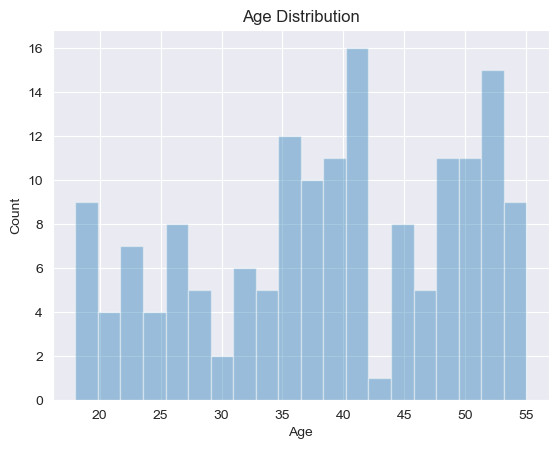

The most frequent age is 42.0 years old


In [37]:
# plotting age distribution
sns.distplot(data['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print('The most frequent age is ' + str(data['age'].mode()[0]) + ' years old')

# the missing age is replaced with the most common value 
data['age'].fillna(data['age'].mode()[0], inplace = True)

In [38]:
# new age groups 
ages = sorted(data.age.unique())

young = ages[:14]
middle = ages[14:28]
senor = ages[28:]

# replacing age with the new groups taken from ages
data['age'] = data['age'].replace(young, 0)
data['age'] = data['age'].replace(middle, 1)
data['age'] = data['age'].replace(senor, 2)

C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\3929369177.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['gender'], bins = 4, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')


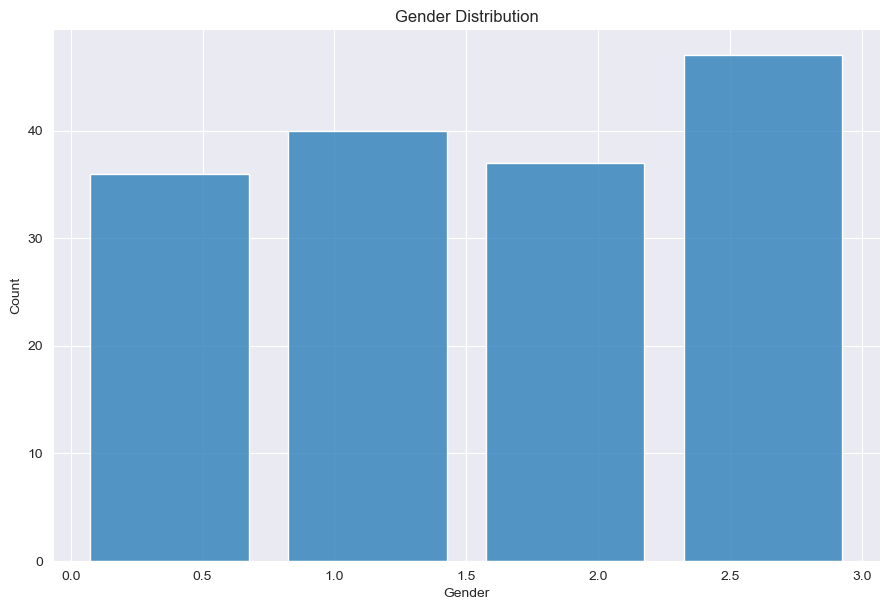

Most of the survey partecipants didn't mention their gender


In [39]:
# plotting gender distribution
sns.displot(data['gender'], bins = 4, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Most of the survey partecipants didn't mention their gender")

In [40]:
# nan values for the age filled with the mode (in this case is 42)
print(data['education'].value_counts(ascending = False))

# nan values for education filled with the mode (in this case is high school)
data['education'].fillna(data['education'].mode()[0], inplace = True)


13.0    56
8.0     36
18.0    34
22.0    17
5.0      8
25.0     8
Name: education, dtype: int64


C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\2423747513.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['marital'], bins = 6, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')


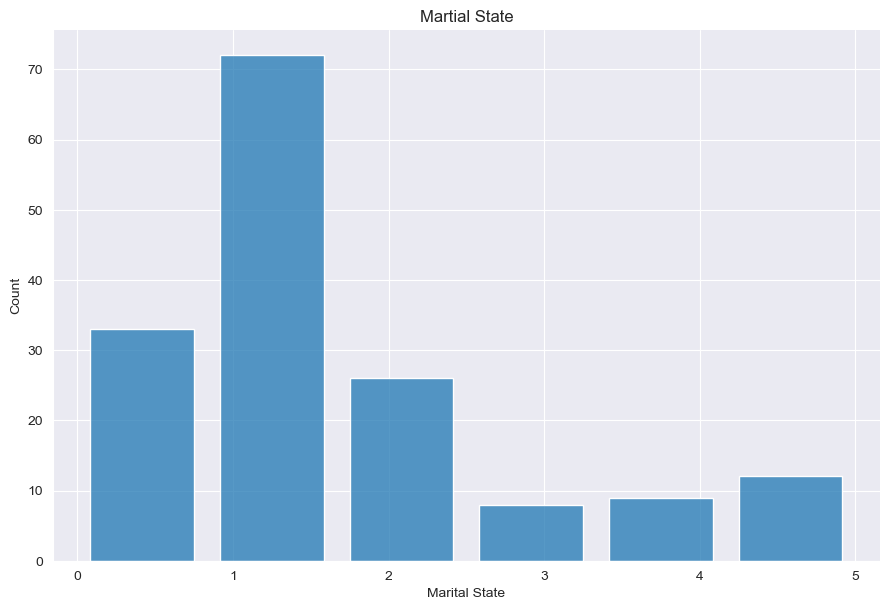

In [65]:
# plotting marital distribution
sns.displot(data['marital'], bins = 6, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')
plt.title('Martial State')
plt.xlabel('Marital State')
plt.ylabel('Count')
plt.show()

C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\3823760641.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['income'], bins = 46, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')


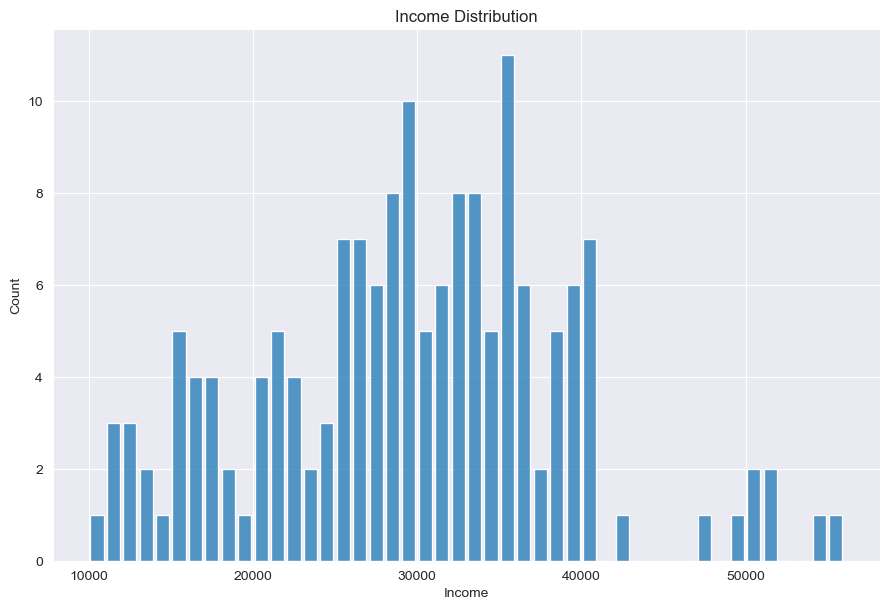

In [76]:
# plotting of income distributtion 
sns.displot(data['income'], bins = 46, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [42]:
# isolating the phq questionnaire
phq = data.columns[5:14]
phqdata = data[phq]
# each feature related to phq goes from 0 to 3 being 0 the less stressed level and 3 the most stressed one
# the features of this category may be already considered as labeled since their value never goes out of such interval ([0-3]) 
# the strategy that may be applied in the filling of the nan can be filling the missing values with the most plausible number given the user at hand (if possible)

In [43]:
# the most problematic feature seems to be phq_2, which has 5 missing values 
phqdata.isnull().sum()

phq_1    0
phq_2    5
phq_3    1
phq_4    0
phq_5    0
phq_6    0
phq_7    1
phq_8    1
phq_9    1
dtype: int64

In [44]:
# finding the rows that has missing values in pqhdata
# i've decided to opt for the full graph since it is more clear on the general situation of the person that didn't answer
data[phqdata.isnull().any(axis=1)]

# in this way it is possible to see that:
# all the NaN values are form people in the second age group (so basically middle age) and they tend to have a middle/low education level and on average not a so bad income (?)

age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
4    1.0       2       13.0        1   40000      0    NaN    0.0      0   
32   1.0       1        8.0        1   24000      0    1.0    0.0      1   
39   1.0       3        8.0        4   13000      0    0.0    0.0      0   
44   1.0       3       13.0        3   36000      0    1.0    0.0      1   
59   0.0       1       22.0        0   29000      0    NaN    0.0      1   
77   1.0       3       13.0        1   32000      2    1.0    NaN      1   
94   1.0       2       13.0        1   40000      0    NaN    0.0      0   
106  1.0       2       13.0        1   40000      0    NaN    0.0      0   
158  1.0       1        8.0        1   11000      0    NaN    1.0      0   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
4        1  ...    6.0    6.0    0.0    0.0      6      1      1       0   
32       0  ...    3.0    4.0    2.0    3.0      0      3      6       1   
39       0  ...    5.0    4.0    5.0    3.0      1      0      1       1   
44       2  ...    6.0    2.0    0.0    4.0      3      0      5       3   
59       0  ...    6.0    1.0    0.0    6.0      6      0      0       6   
77       0  ...    5.0    4.0    0.0    4.0      6      0      1       3   
94       1  ...    6.0    6.0    0.0    0.0      6      1      1       0   
106      1  ...    6.0    6.0    0.0    0.0      6      1      1       0   
158      0  ...    0.0    1.0    0.0    1.0      3      4      0       0   

     ccs_11  ccs_12  
4         5       4  
32        3       0  
39        6       3  
44        3       5  
59        0       6  
77        1       6  
94        5       4  
106       5       4  
158       4       2  

[9 rows x 54 columns]

In [77]:
# the sum of all the features in each row
phqdata['sum'] = phqdata.sum(axis=1)
phqdata

C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\3588502370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phqdata['sum'] = phqdata.sum(axis=1)


phq_1  phq_2  phq_3  phq_4  phq_5  phq_6  phq_7  phq_8  phq_9  sum
0        0    0.0    1.0      0      0      0    1.0    0.0    0.0  2.0
1        0    0.0    0.0      0      0      0    0.0    0.0    0.0  0.0
2        0    0.0    0.0      0      1      0    0.0    0.0    0.0  1.0
3        2    1.0    0.0      0      2      0    0.0    0.0    0.0  5.0
4        0    NaN    0.0      0      1      2    2.0    1.0    0.0  6.0
..     ...    ...    ...    ...    ...    ...    ...    ...    ...  ...
155      0    2.0    0.0      2      0      2    0.0    1.0    0.0  7.0
156      2    1.0    2.0      0      2      1    0.0    0.0    1.0  9.0
157      0    0.0    2.0      1      0      0    0.0    0.0    2.0  5.0
158      0    NaN    1.0      0      0      0    0.0    0.0    0.0  1.0
159      0    0.0    0.0      0      0      0    0.0    0.0    0.0  0.0

[160 rows x 10 columns]

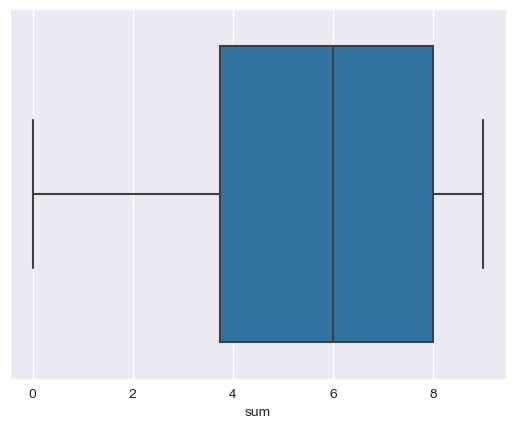

In [79]:
# boxplot of the sum of the features in phq displaying outliers 
sns.boxplot(x = phqdata['sum'])
plt.show()

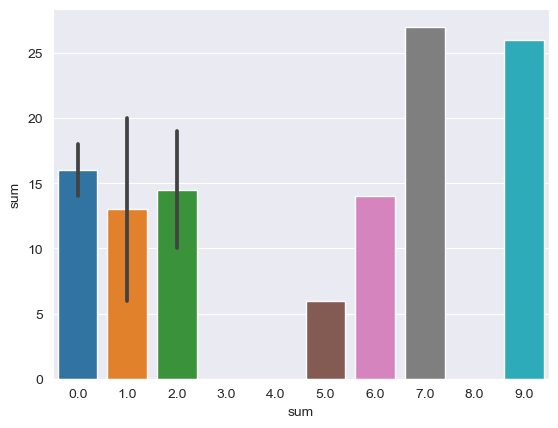

In [84]:
# barplot of the sums 
sns.barplot(x = phqdata['sum'], y = phqdata['sum'].value_counts())
plt.show()

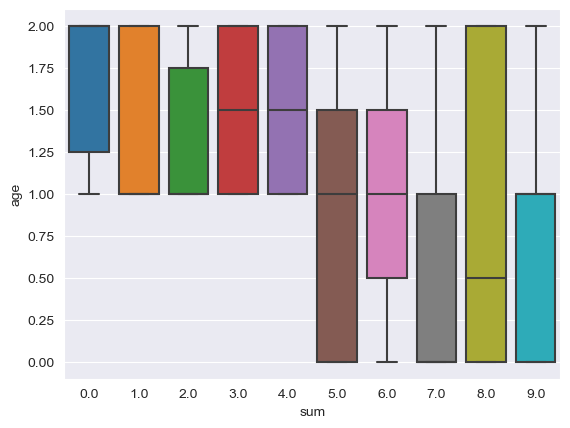

In [91]:
# boxplot of the sum in phqdata and the age
sns.boxplot(x = phqdata['sum'], y = data['age'])
plt.show()

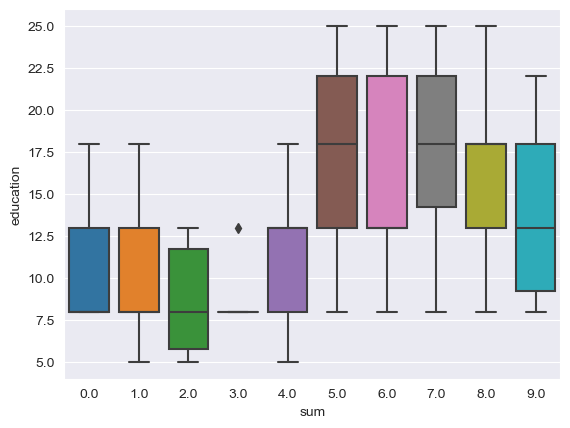

In [92]:
# boxplot of the sum in phqdata and the education
sns.boxplot(x = phqdata['sum'], y = data['education'])
plt.show()

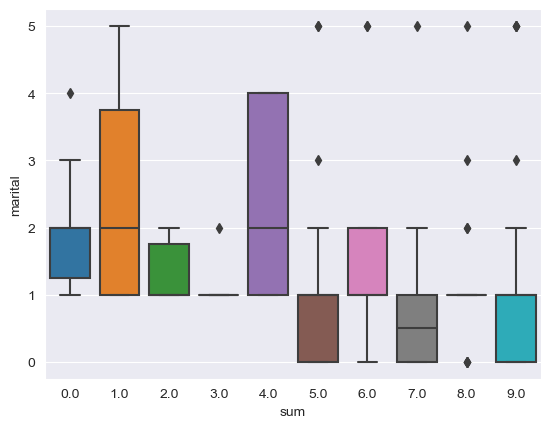

In [93]:
# boxplot of the sum in phqdata and the marital
sns.boxplot(x = phqdata['sum'], y = data['marital'])
plt.show()

In [45]:
# isolating the gad questionnaire
gad = data.columns[14:21]
gadata = data[gad]
gadata

gad_1  gad_2  gad_3  gad_4  gad_5  gad_6  gad_7
0      0.0      0    0.0    0.0    0.0    0.0    0.0
1      1.0      1    0.0    0.0    0.0    0.0    1.0
2      0.0      1    1.0    0.0    1.0    0.0    1.0
3      3.0      3    2.0    3.0    3.0    2.0    3.0
4      2.0      0    2.0    2.0    0.0    0.0    0.0
..     ...    ...    ...    ...    ...    ...    ...
155    3.0      0    1.0    3.0    0.0    3.0    3.0
156    0.0      1    2.0    0.0    2.0    0.0    2.0
157    0.0      2    0.0    1.0    1.0    0.0    2.0
158    0.0      0    0.0    0.0    0.0    1.0    1.0
159    1.0      0    0.0    0.0    1.0    0.0    1.0

[160 rows x 7 columns]

In [46]:
gadata.isnull().sum()

gad_1    1
gad_2    0
gad_3    1
gad_4    1
gad_5    1
gad_6    1
gad_7    1
dtype: int64

In [47]:
# finding the rows that has missing values in gadata
data[gadata.isnull().any(axis=1)]

# situation here isa bit more vary 
# seems like there is not really a specific target class that didn't answer to the questions 
# major age group represented is the first one (not so slightly actually...)
# first 4 answered a bit strange in phq (they put 0 and 2) but the last two seems like they have low answers in the phq so i guess they can be kept just so in gad since they answered low in the other answers too 

age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
22   0.0       3       13.0        0   32000      2    2.0    0.0      0   
36   0.0       3       18.0        0   33000      0    0.0    1.0      2   
57   0.0       1       13.0        0   39000      1    2.0    1.0      2   
62   2.0       0       18.0        1   29000      0    2.0    0.0      0   
101  1.0       2        8.0        1   17000      1    0.0    0.0      0   
154  2.0       2        8.0        1   13000      0    0.0    1.0      0   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
22       0  ...    4.0    6.0    0.0    5.0      5      1      0       1   
36       0  ...    5.0    1.0    2.0    6.0      4      0      2       4   
57       2  ...    4.0    1.0    0.0    6.0      4      0      2       6   
62       1  ...    5.0    3.0    0.0    4.0      3      0      1       2   
101      0  ...    1.0    1.0    0.0    3.0      6      6      1       1   
154      0  ...    0.0    4.0    0.0    0.0      5      4      2       0   

     ccs_11  ccs_12  
22        2       5  
36        1       6  
57        2       5  
62        2       6  
101       5       0  
154       3       0  

[6 rows x 54 columns]

In [80]:
# the sum of all the features in each row
gadata['sum'] = phqdata.sum(axis=1)
gadata

C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\420766386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gadata['sum'] = phqdata.sum(axis=1)


gad_1  gad_2  gad_3  gad_4  gad_5  gad_6  gad_7   sum
0      0.0      0    0.0    0.0    0.0    0.0    0.0   4.0
1      1.0      1    0.0    0.0    0.0    0.0    1.0   0.0
2      0.0      1    1.0    0.0    1.0    0.0    1.0   2.0
3      3.0      3    2.0    3.0    3.0    2.0    3.0  10.0
4      2.0      0    2.0    2.0    0.0    0.0    0.0  12.0
..     ...    ...    ...    ...    ...    ...    ...   ...
155    3.0      0    1.0    3.0    0.0    3.0    3.0  14.0
156    0.0      1    2.0    0.0    2.0    0.0    2.0  18.0
157    0.0      2    0.0    1.0    1.0    0.0    2.0  10.0
158    0.0      0    0.0    0.0    0.0    1.0    1.0   2.0
159    1.0      0    0.0    0.0    1.0    0.0    1.0   0.0

[160 rows x 8 columns]

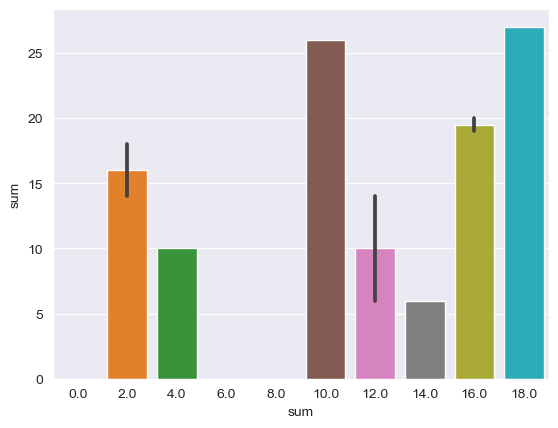

In [82]:
# barplot of all the values of the feature sum in gadata
sns.barplot(x = gadata['sum'], y = gadata['sum'].value_counts())
plt.show()

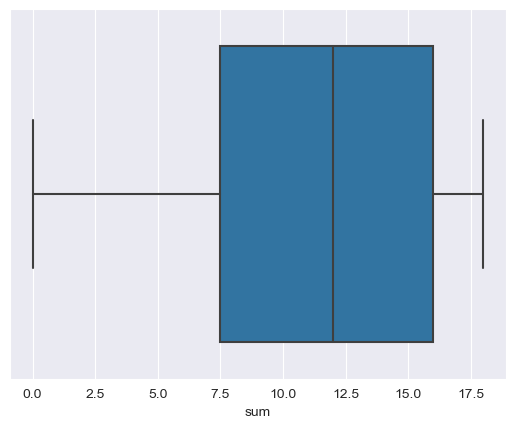

In [81]:
# boxplot of the sum of the features in gad displaying outliers
sns.boxplot(x = gadata['sum'])
plt.show()

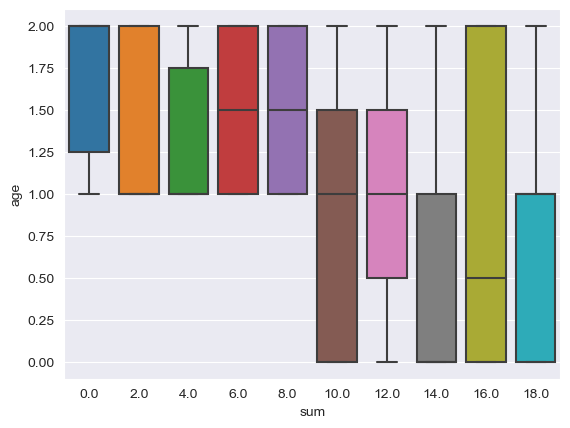

In [90]:
# boxplot of the sum in gadata and the age
sns.boxplot(x = gadata['sum'], y = data['age'])
plt.show()

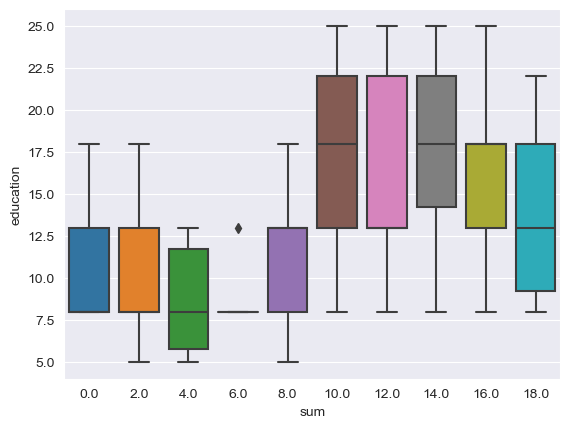

In [94]:
# boxplot of the sum in gadata and the education
sns.boxplot(x = gadata['sum'], y = data['education'])
plt.show()

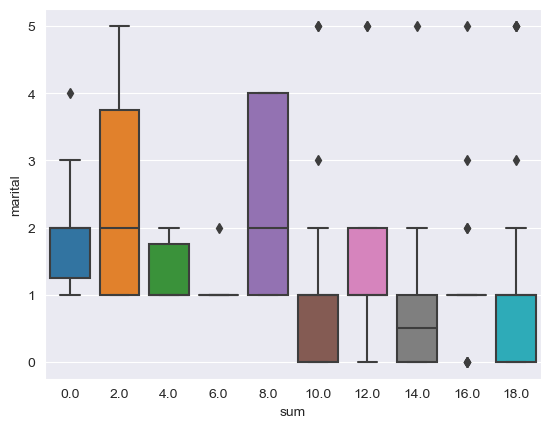

In [97]:
# boxplot of the sum in gadata and the marital
sns.boxplot(x = gadata['sum'], y = data['marital'])
plt.show()

In [48]:
# isolating the eheals questionnaire
eheals = data.columns[21:29]
eheals = data[eheals]
eheals

eheals_1  eheals_2  eheals_3  eheals_4  eheals_5  eheals_6  eheals_7  \
0         3.0       NaN       3.0       2.0       1.0         0         2   
1         2.0       4.0       4.0       4.0       4.0         4         0   
2         0.0       4.0       2.0       4.0       3.0         3         4   
3         5.0       5.0       5.0       5.0       5.0         5         5   
4         5.0       5.0       0.0       0.0       5.0         5         5   
..        ...       ...       ...       ...       ...       ...       ...   
155       5.0       3.0       5.0       5.0       5.0         5         5   
156       3.0       5.0       5.0       5.0       5.0         0         3   
157       5.0       5.0       5.0       5.0       5.0         3         4   
158       4.0       3.0       3.0       4.0       1.0         3         4   
159       4.0       1.0       3.0       4.0       4.0         4         2   

     eheals_8  
0         2.0  
1         3.0  
2         0.0  
3         5.0  
4         4.0  
..        ...  
155       5.0  
156       5.0  
157       0.0  
158       4.0  
159       4.0  

[160 rows x 8 columns]

In [49]:
eheals.isnull().sum()

eheals_1    2
eheals_2    4
eheals_3    2
eheals_4    2
eheals_5    2
eheals_6    0
eheals_7    0
eheals_8    1
dtype: int64

In [50]:
# finding the rows that has missing values in eheals 
data[eheals.isnull().any(axis=1)]

# i'm honestly clueless so how to fill this values 

age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    1.0       1        5.0        1   18000      0    0.0    1.0      0   
9    1.0       2       13.0        1   35000      2    0.0    2.0      1   
11   0.0       3       25.0        1   36000      2    2.0    0.0      0   
24   0.0       1       13.0        1   27000      0    2.0    0.0      0   
25   2.0       2        8.0        5   39000      2    0.0    2.0      1   
27   0.0       3       25.0        1   27000      2    2.0    0.0      0   
33   1.0       1       25.0        0   28000      0    0.0    2.0      0   
70   2.0       0        8.0        2   15399      0    0.0    0.0      0   
81   0.0       2       18.0        5   27000      2    0.0    0.0      0   
108  2.0       1        8.0        4   20000      1    0.0    0.0      0   
135  1.0       3       13.0        1   17000      1    0.0    0.0      0   
142  1.0       3        8.0        1   22000      0    0.0    0.0      0   
148  0.0       1       18.0        0   27000      1    0.0    1.0      1   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0        0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
9        0  ...    6.0    0.0    1.0    6.0      6      1      6       6   
11       0  ...    6.0    4.0    1.0    6.0      4      1      2       1   
24       0  ...    6.0    0.0    1.0    5.0      6      0      0       5   
25       0  ...    6.0    1.0    2.0    2.0      1      5      0       1   
27       0  ...    6.0    2.0    2.0    4.0      4      0      0       4   
33       2  ...    4.0    0.0    2.0    6.0      6      0      0       6   
70       1  ...    3.0    5.0    0.0    0.0      3      0      2       0   
81       0  ...    6.0    3.0    1.0    6.0      5      4      0       0   
108      0  ...    0.0    1.0    2.0    6.0      6      1      5       4   
135      0  ...    0.0    2.0    0.0    0.0      4      3      6       0   
142      0  ...    0.0    0.0    0.0    6.0      6      5      6       2   
148      0  ...    4.0    1.0    0.0    6.0      5      5      2       0   

     ccs_11  ccs_12  
0         3       1  
9         0       5  
11        0       4  
24        0       5  
25        0       4  
27        0       5  
33        0       6  
70        3       0  
81        1       6  
108       4       5  
135       6       2  
142       6       2  
148       2       5  

[13 rows x 54 columns]

In [86]:
# the sum of all the features in each row
eheals['sum'] = eheals.sum(axis=1)
eheals

C:\Users\mcrin\AppData\Local\Temp\ipykernel_36324\2164450677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eheals['sum'] = eheals.sum(axis=1)


eheals_1  eheals_2  eheals_3  eheals_4  eheals_5  eheals_6  eheals_7  \
0         3.0       NaN       3.0       2.0       1.0         0         2   
1         2.0       4.0       4.0       4.0       4.0         4         0   
2         0.0       4.0       2.0       4.0       3.0         3         4   
3         5.0       5.0       5.0       5.0       5.0         5         5   
4         5.0       5.0       0.0       0.0       5.0         5         5   
..        ...       ...       ...       ...       ...       ...       ...   
155       5.0       3.0       5.0       5.0       5.0         5         5   
156       3.0       5.0       5.0       5.0       5.0         0         3   
157       5.0       5.0       5.0       5.0       5.0         3         4   
158       4.0       3.0       3.0       4.0       1.0         3         4   
159       4.0       1.0       3.0       4.0       4.0         4         2   

     eheals_8   sum  
0         2.0  13.0  
1         3.0  25.0  
2         0.0  20.0  
3         5.0  40.0  
4         4.0  29.0  
..        ...   ...  
155       5.0  38.0  
156       5.0  31.0  
157       0.0  32.0  
158       4.0  26.0  
159       4.0  26.0  

[160 rows x 9 columns]

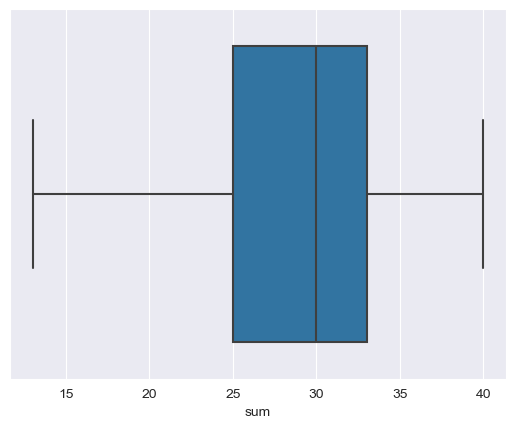

In [87]:
# boxplot of the sum of the features in eheals 
sns.boxplot(x = eheals['sum'])
plt.show()

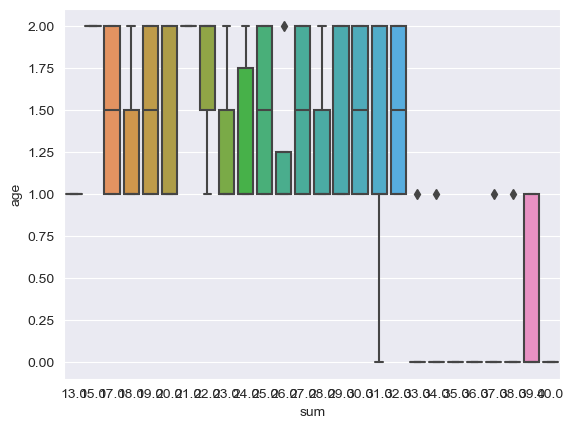

In [89]:
# boxplot of the sum in eheals and the age
sns.boxplot(x = eheals['sum'], y = data['age'])
plt.show()

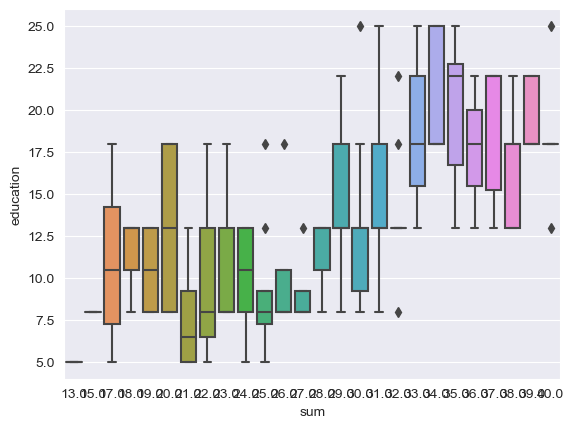

In [98]:
# boxplot of the sum in eheals and the education
sns.boxplot(x = eheals['sum'], y = data['education'])
plt.show()

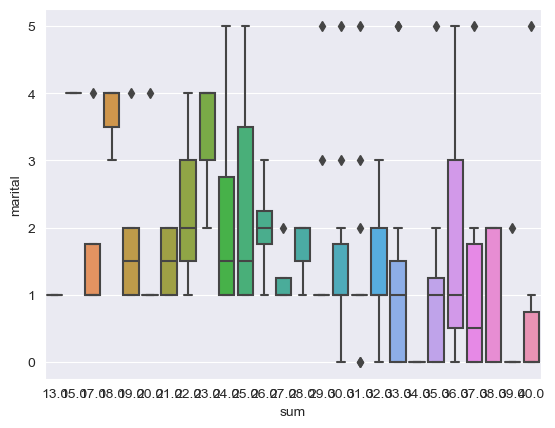

In [99]:
# boxplot of the sum in heals and the marital
sns.boxplot(x = eheals['sum'], y = data['marital'])
plt.show()

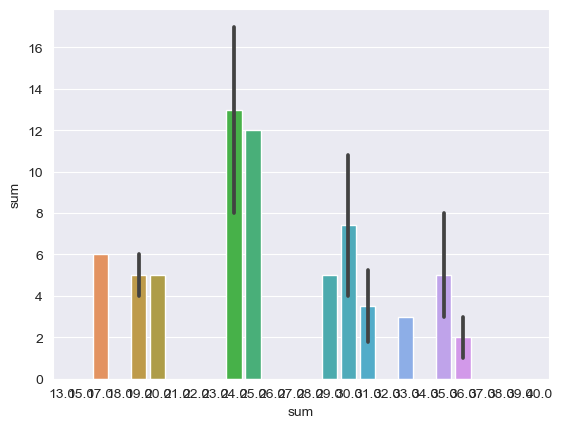

In [88]:
# barplot of all the values of the feature sum
sns.barplot(x = eheals['sum'], y = eheals['sum'].value_counts())
plt.show()

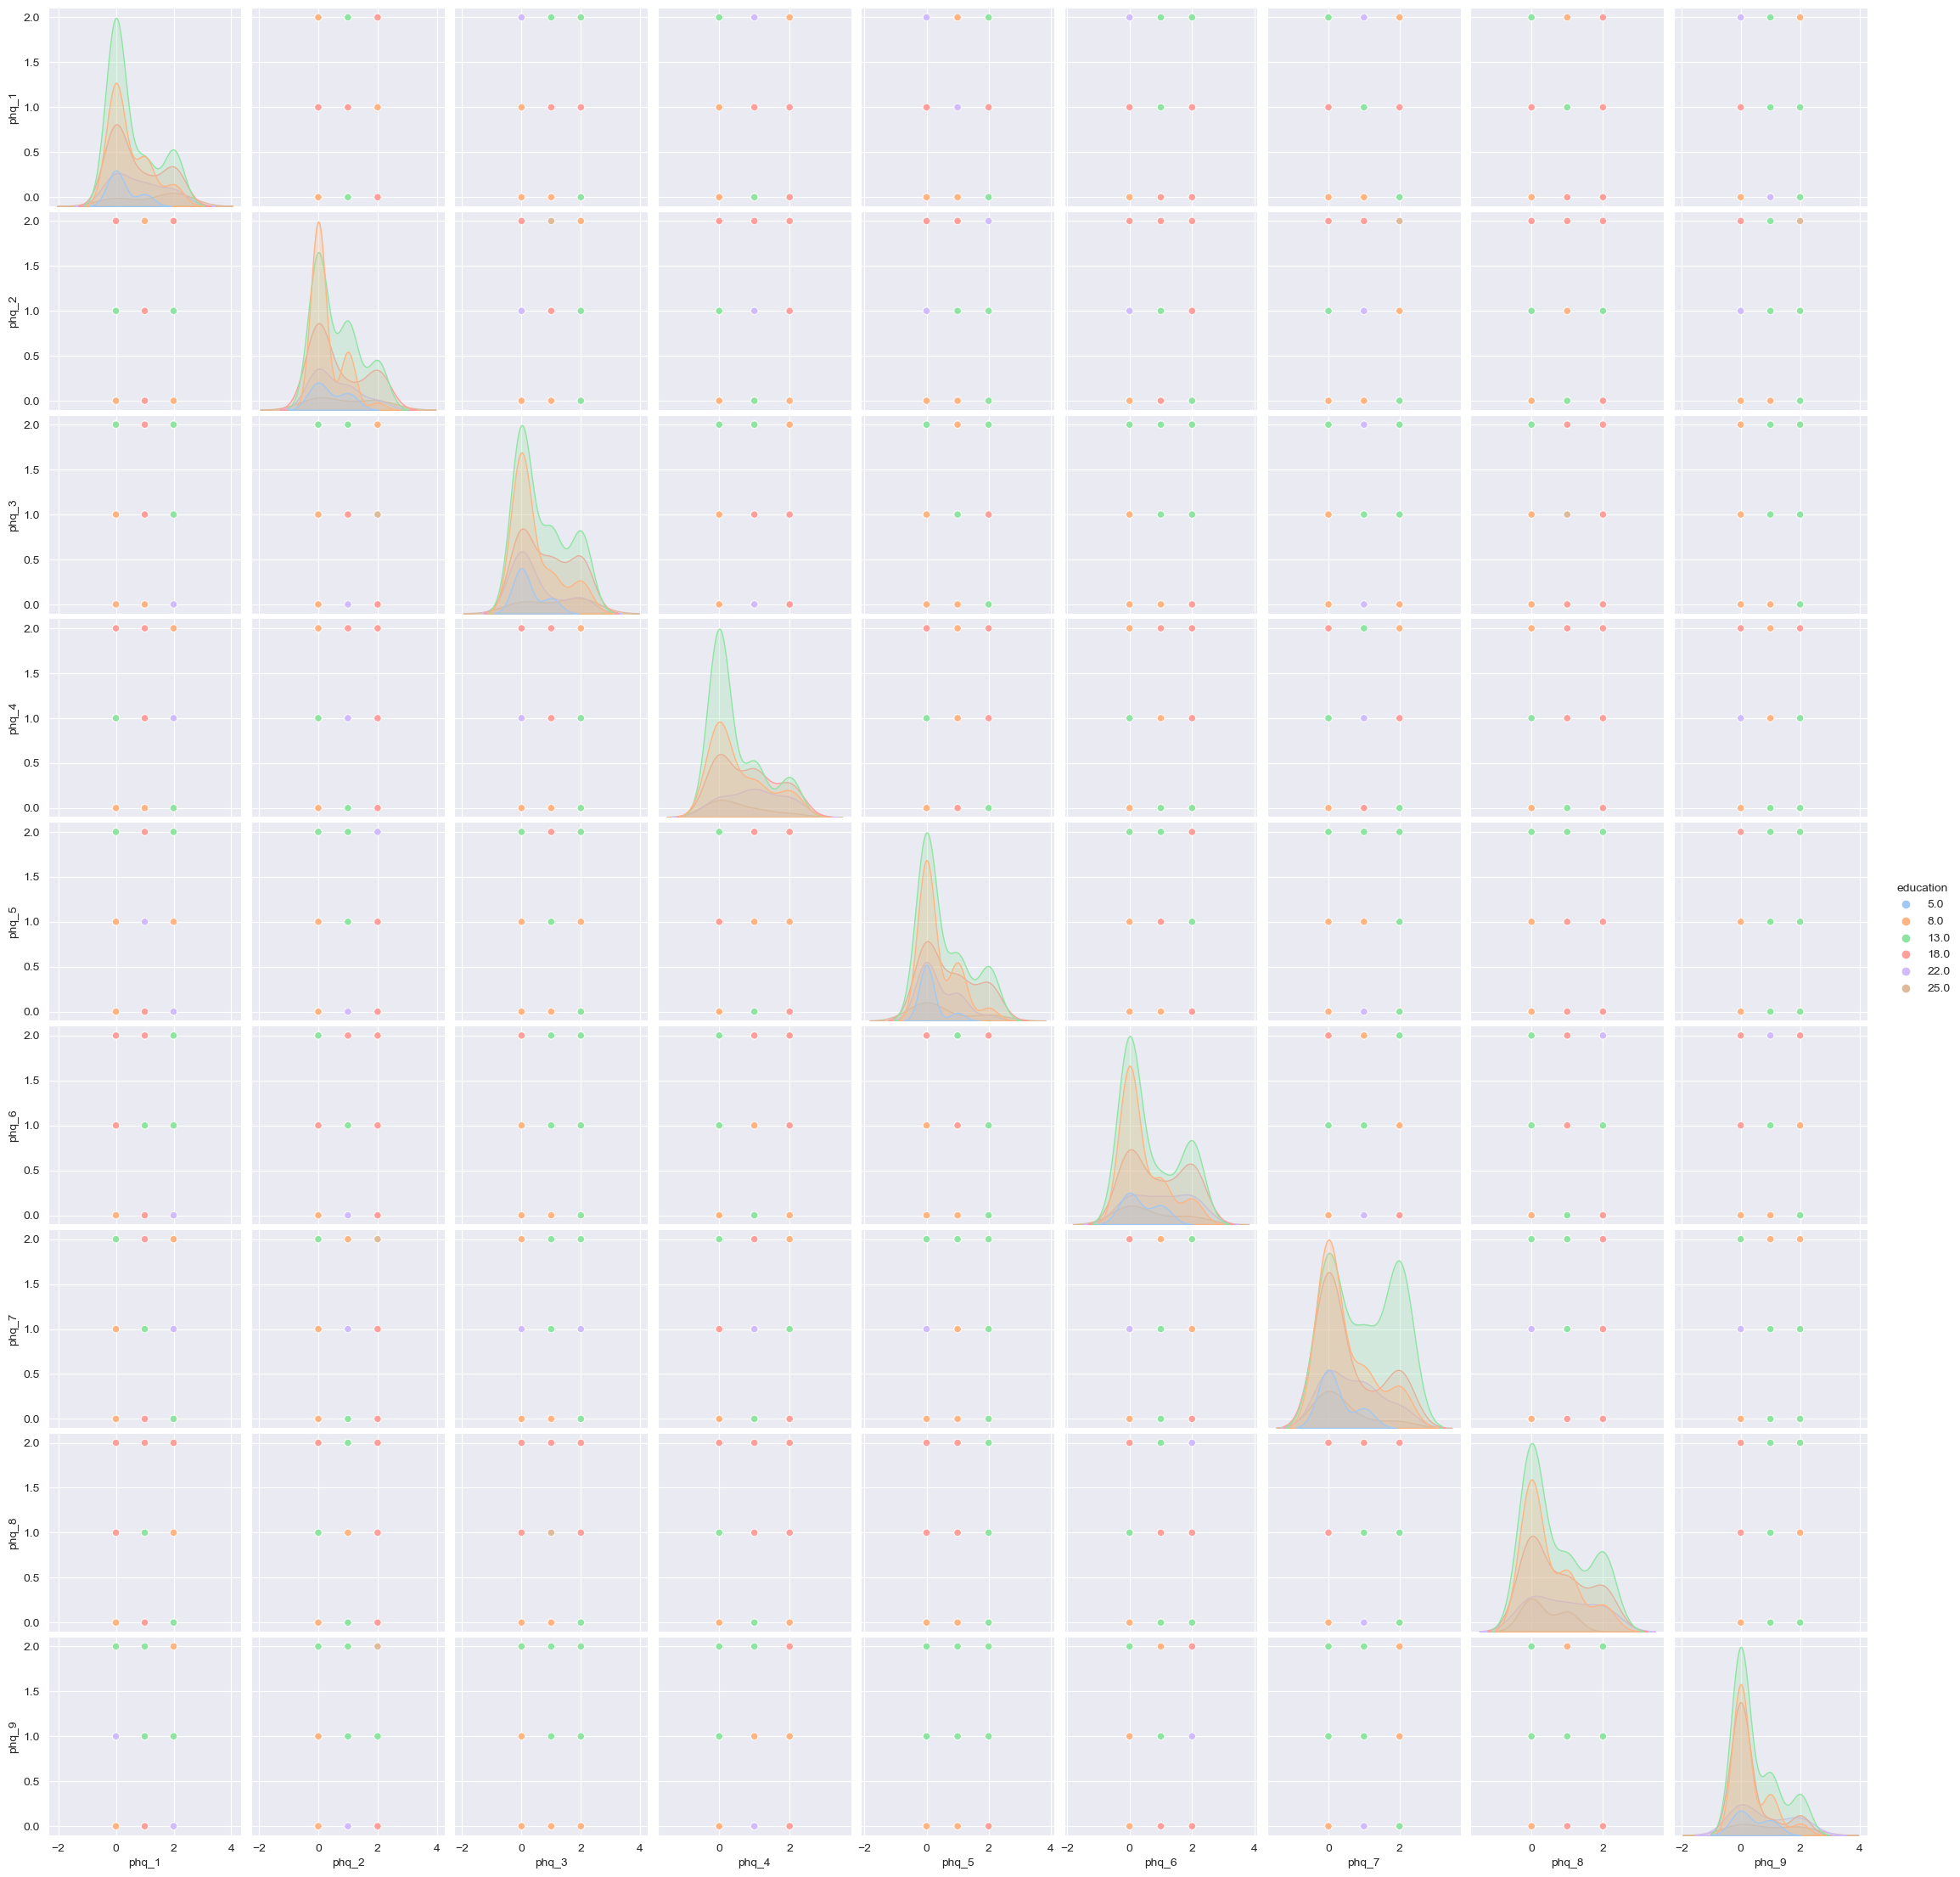

In [51]:
# multivariate analysis of education and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'education', palette = 'pastel')
plt.show()

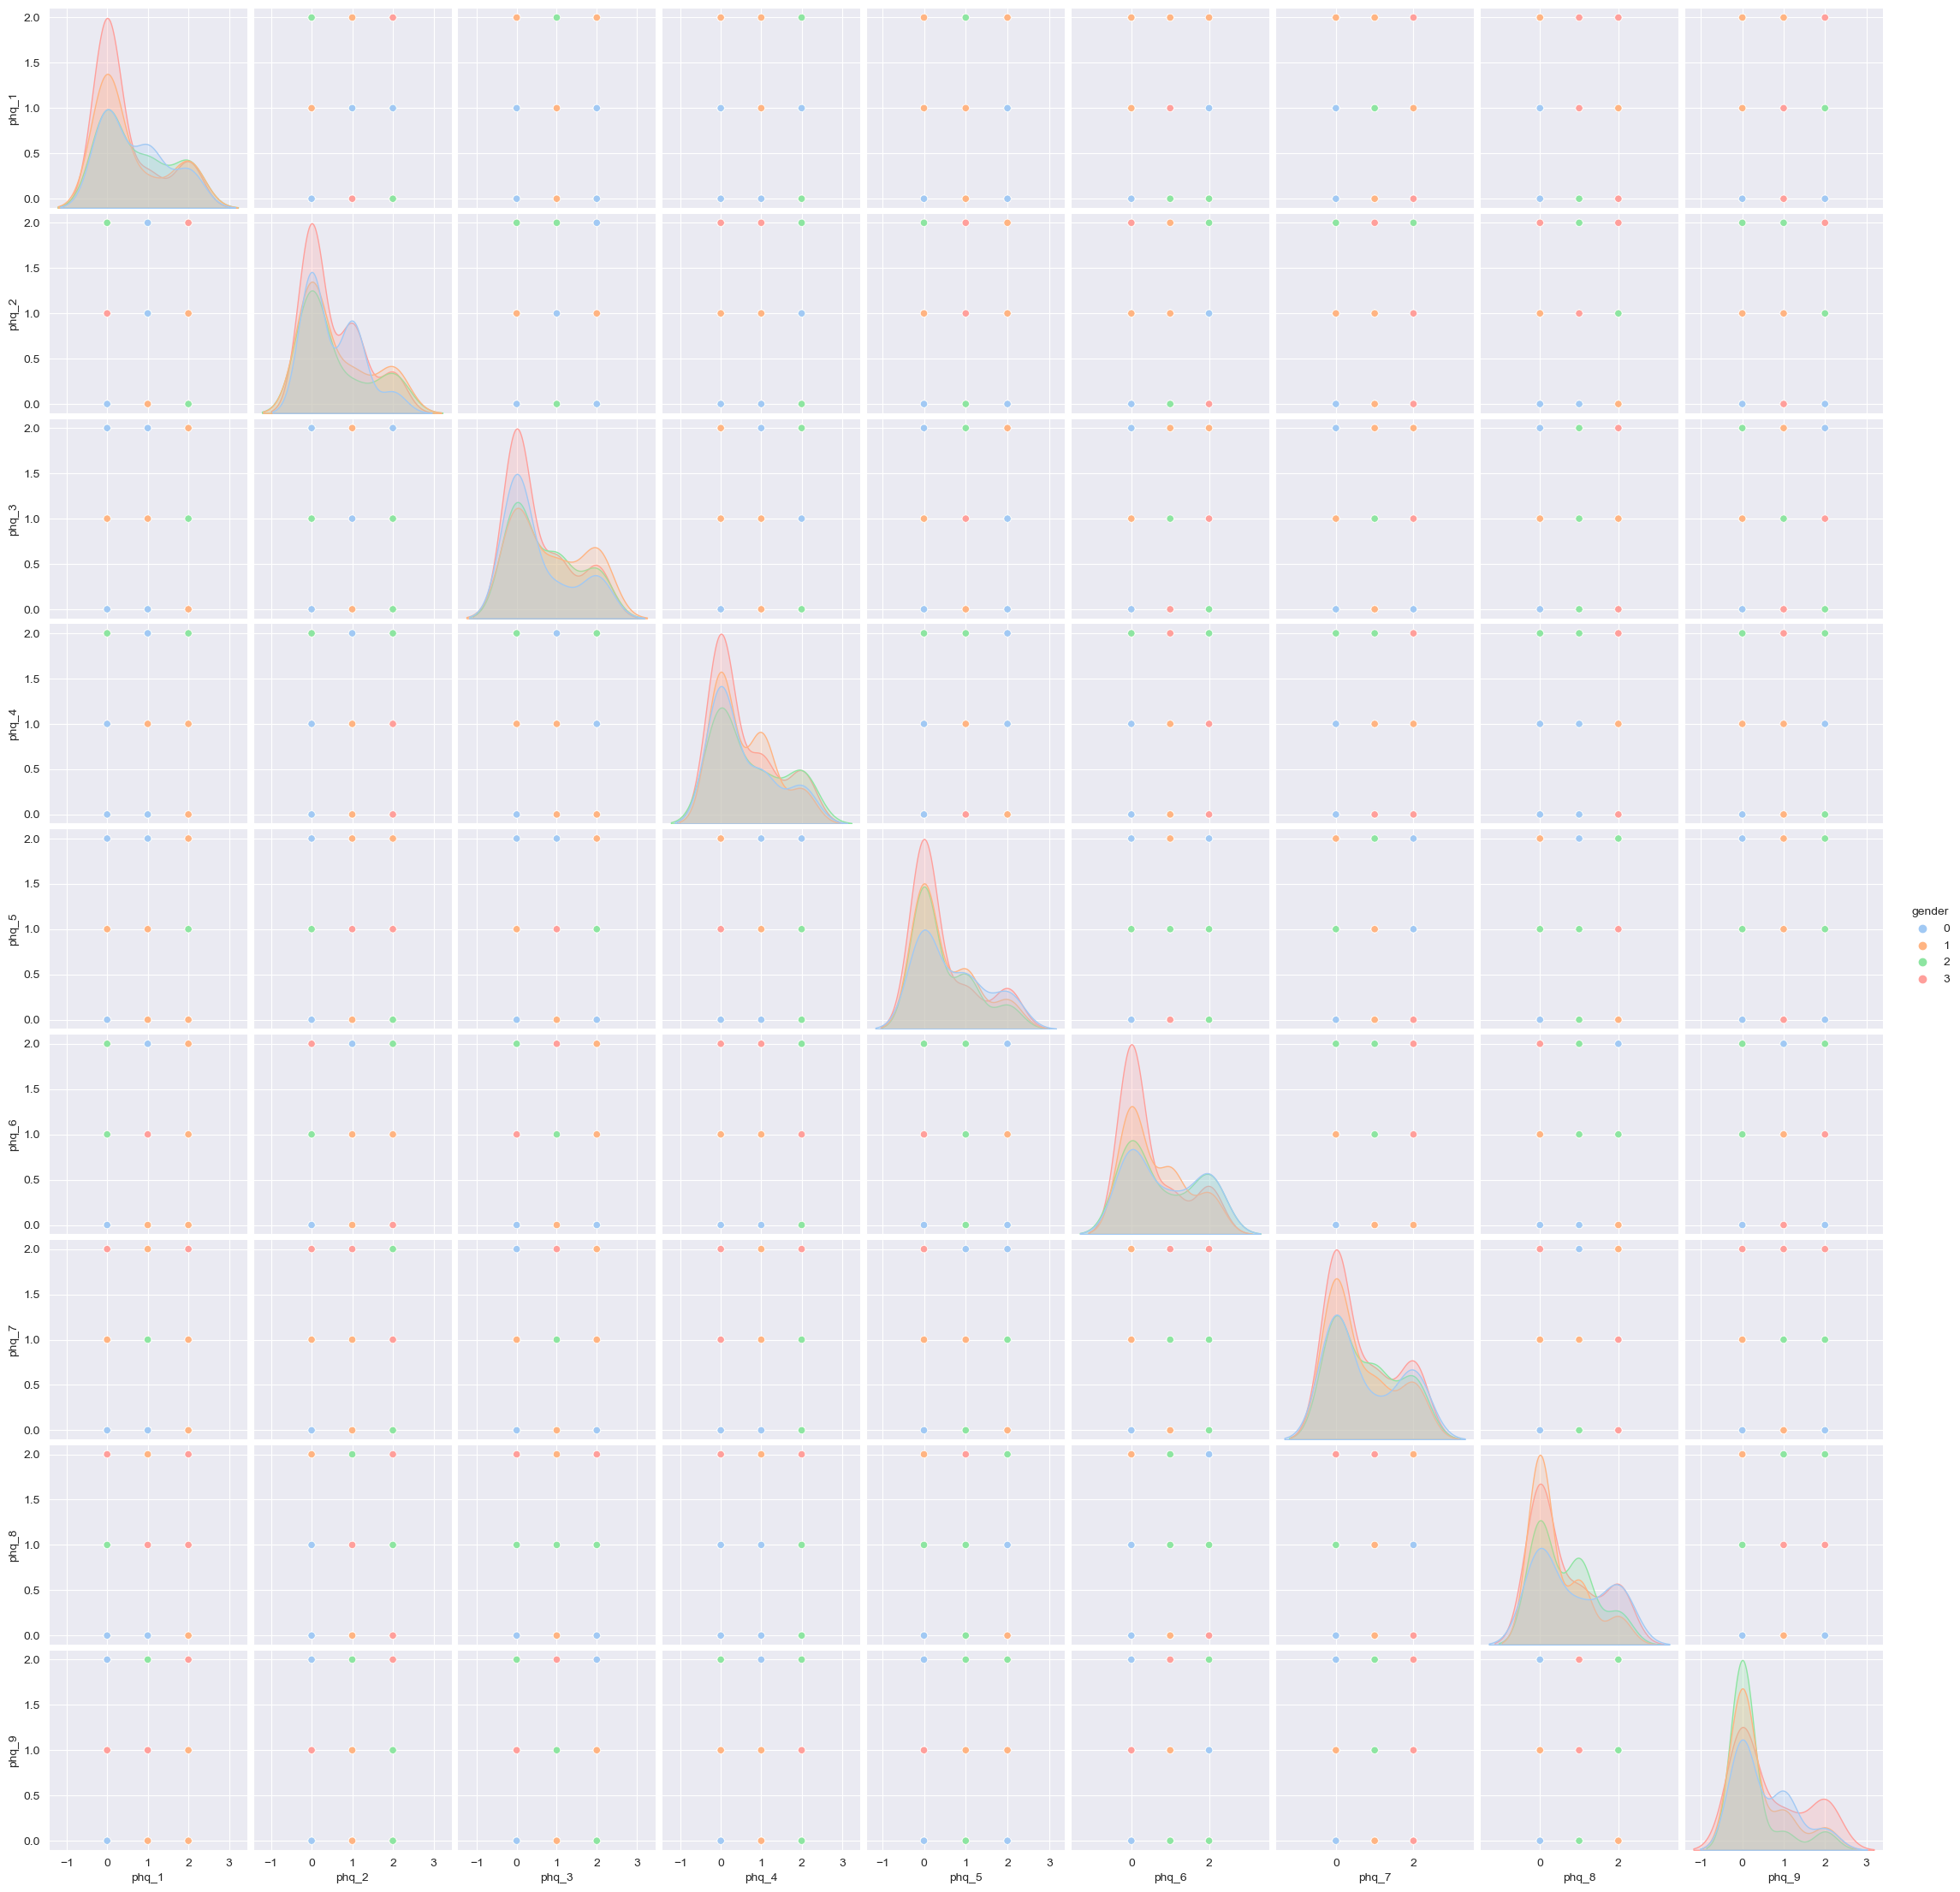

In [52]:
# multivariate analysis of gender and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'gender', palette = 'pastel')
plt.show()

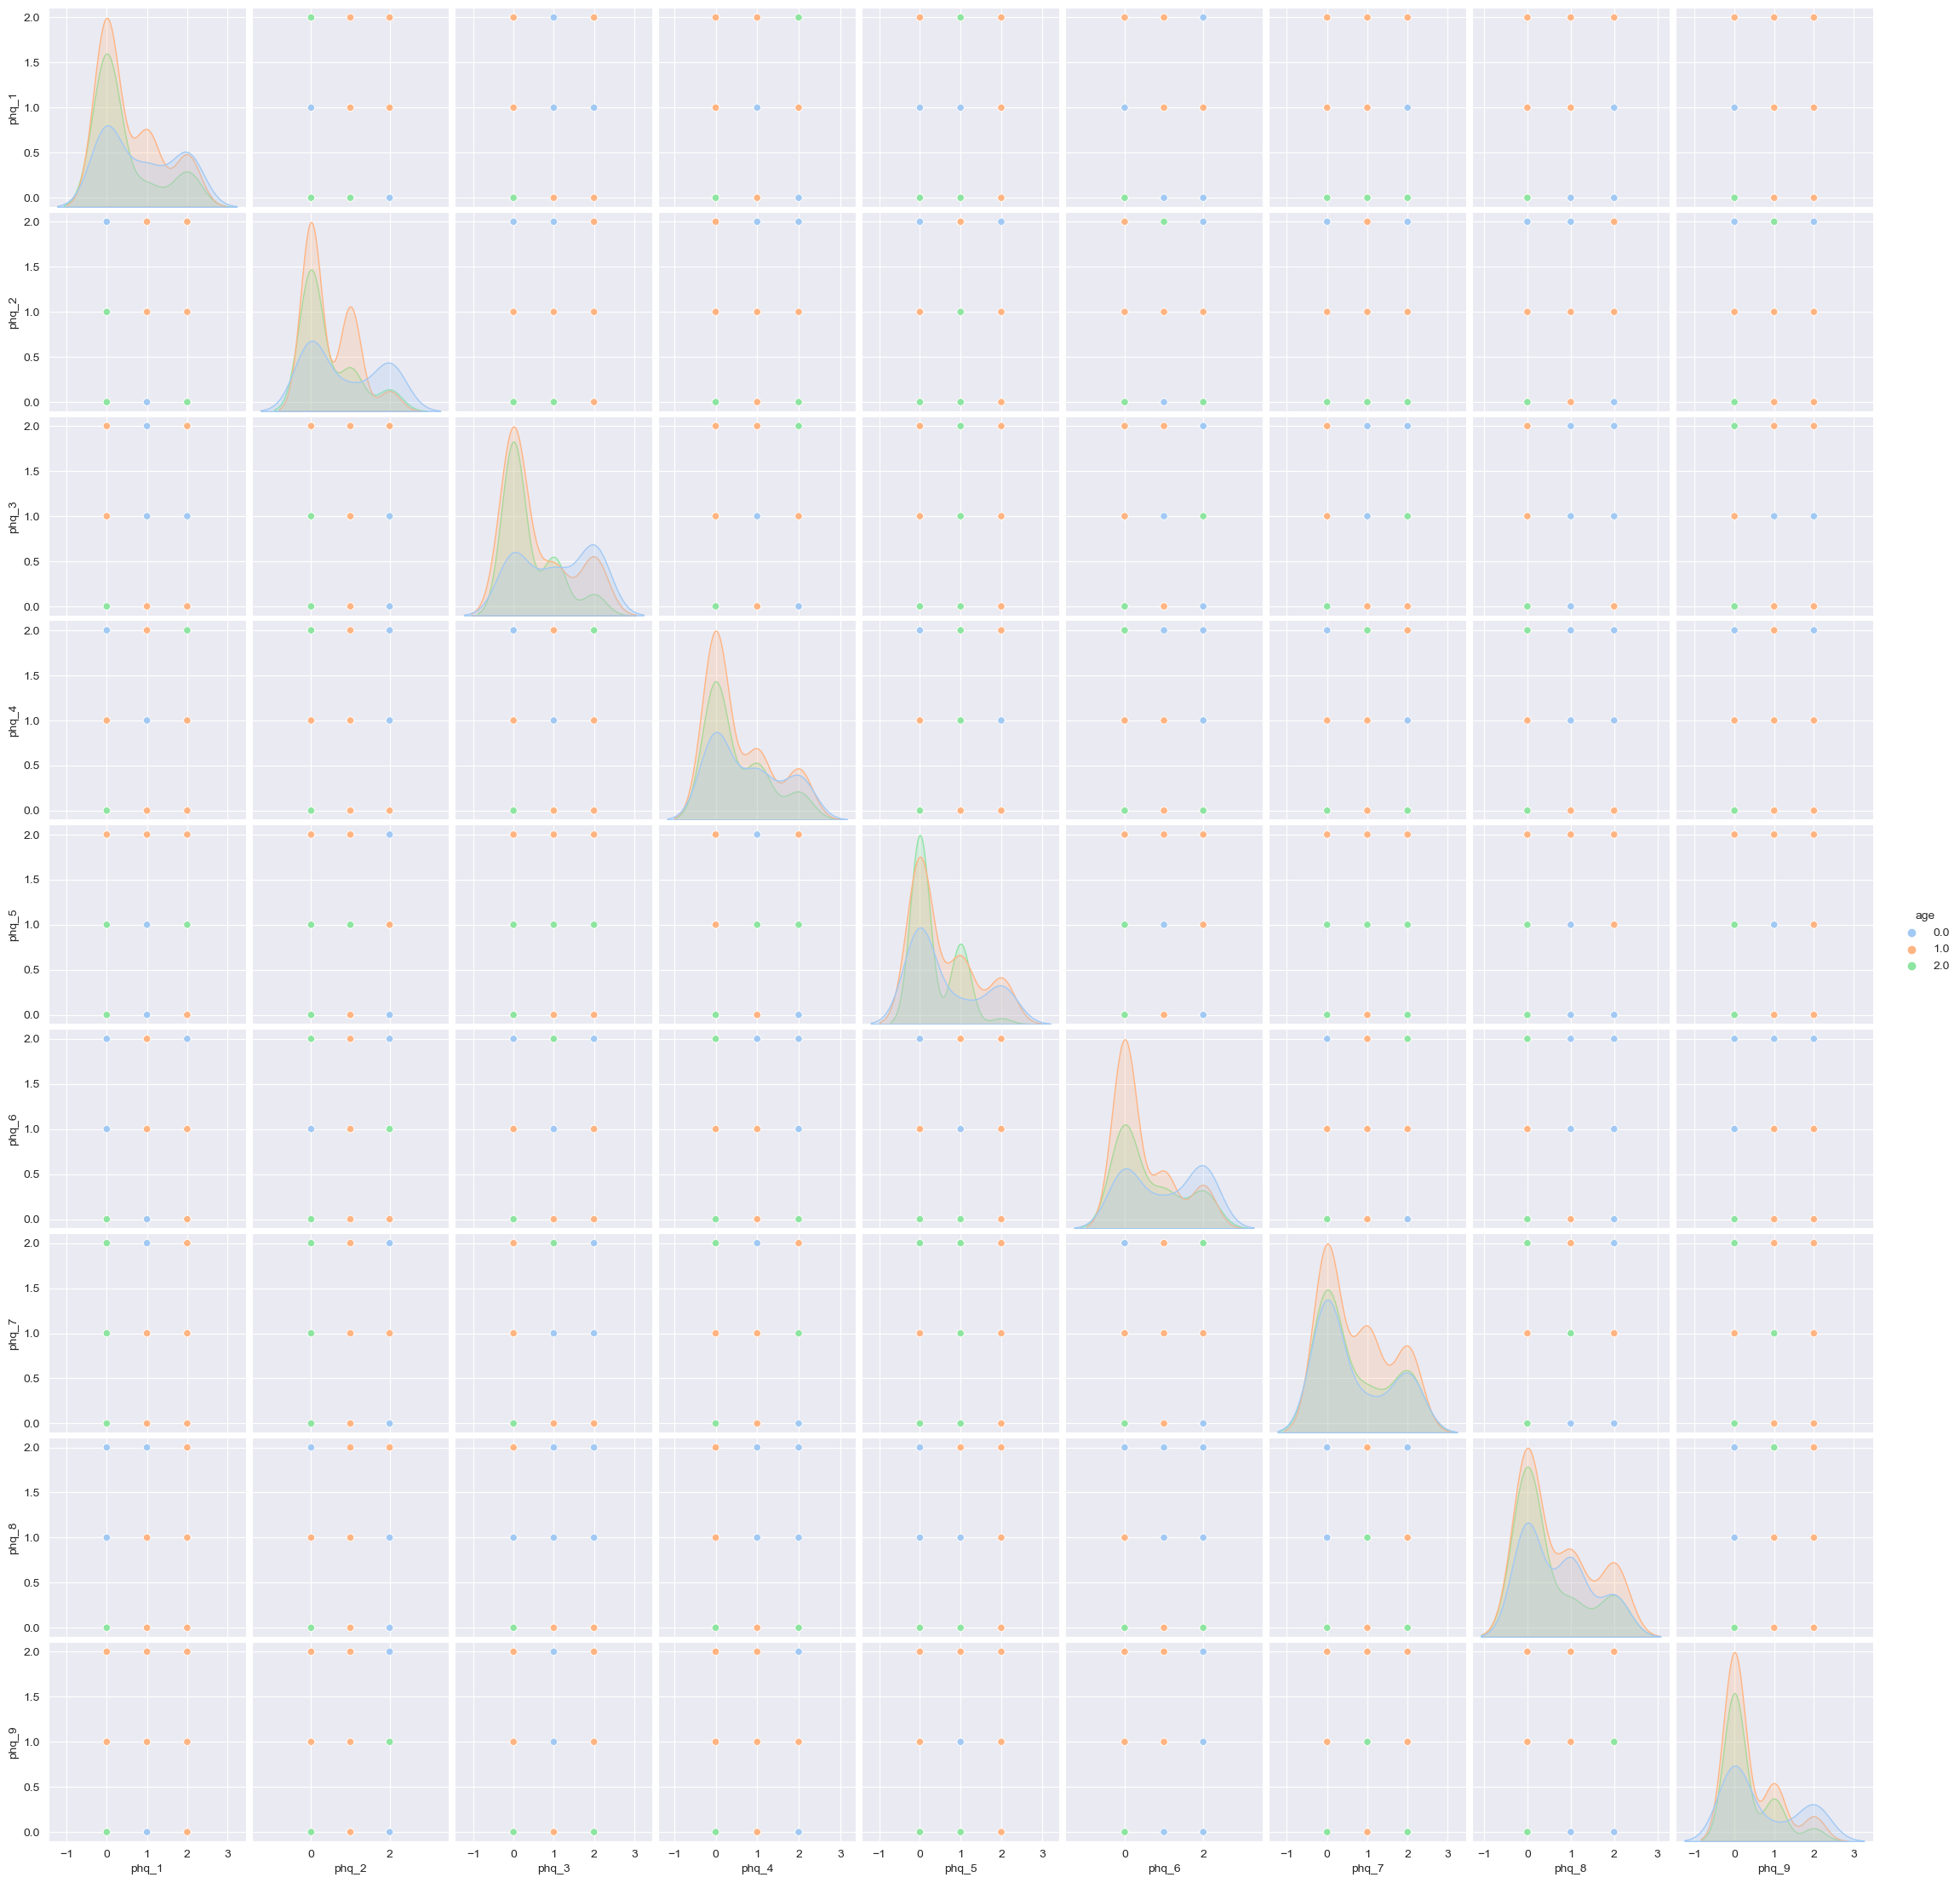

In [53]:
# multivariate analysis of age and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'age', palette = 'pastel')
plt.show()

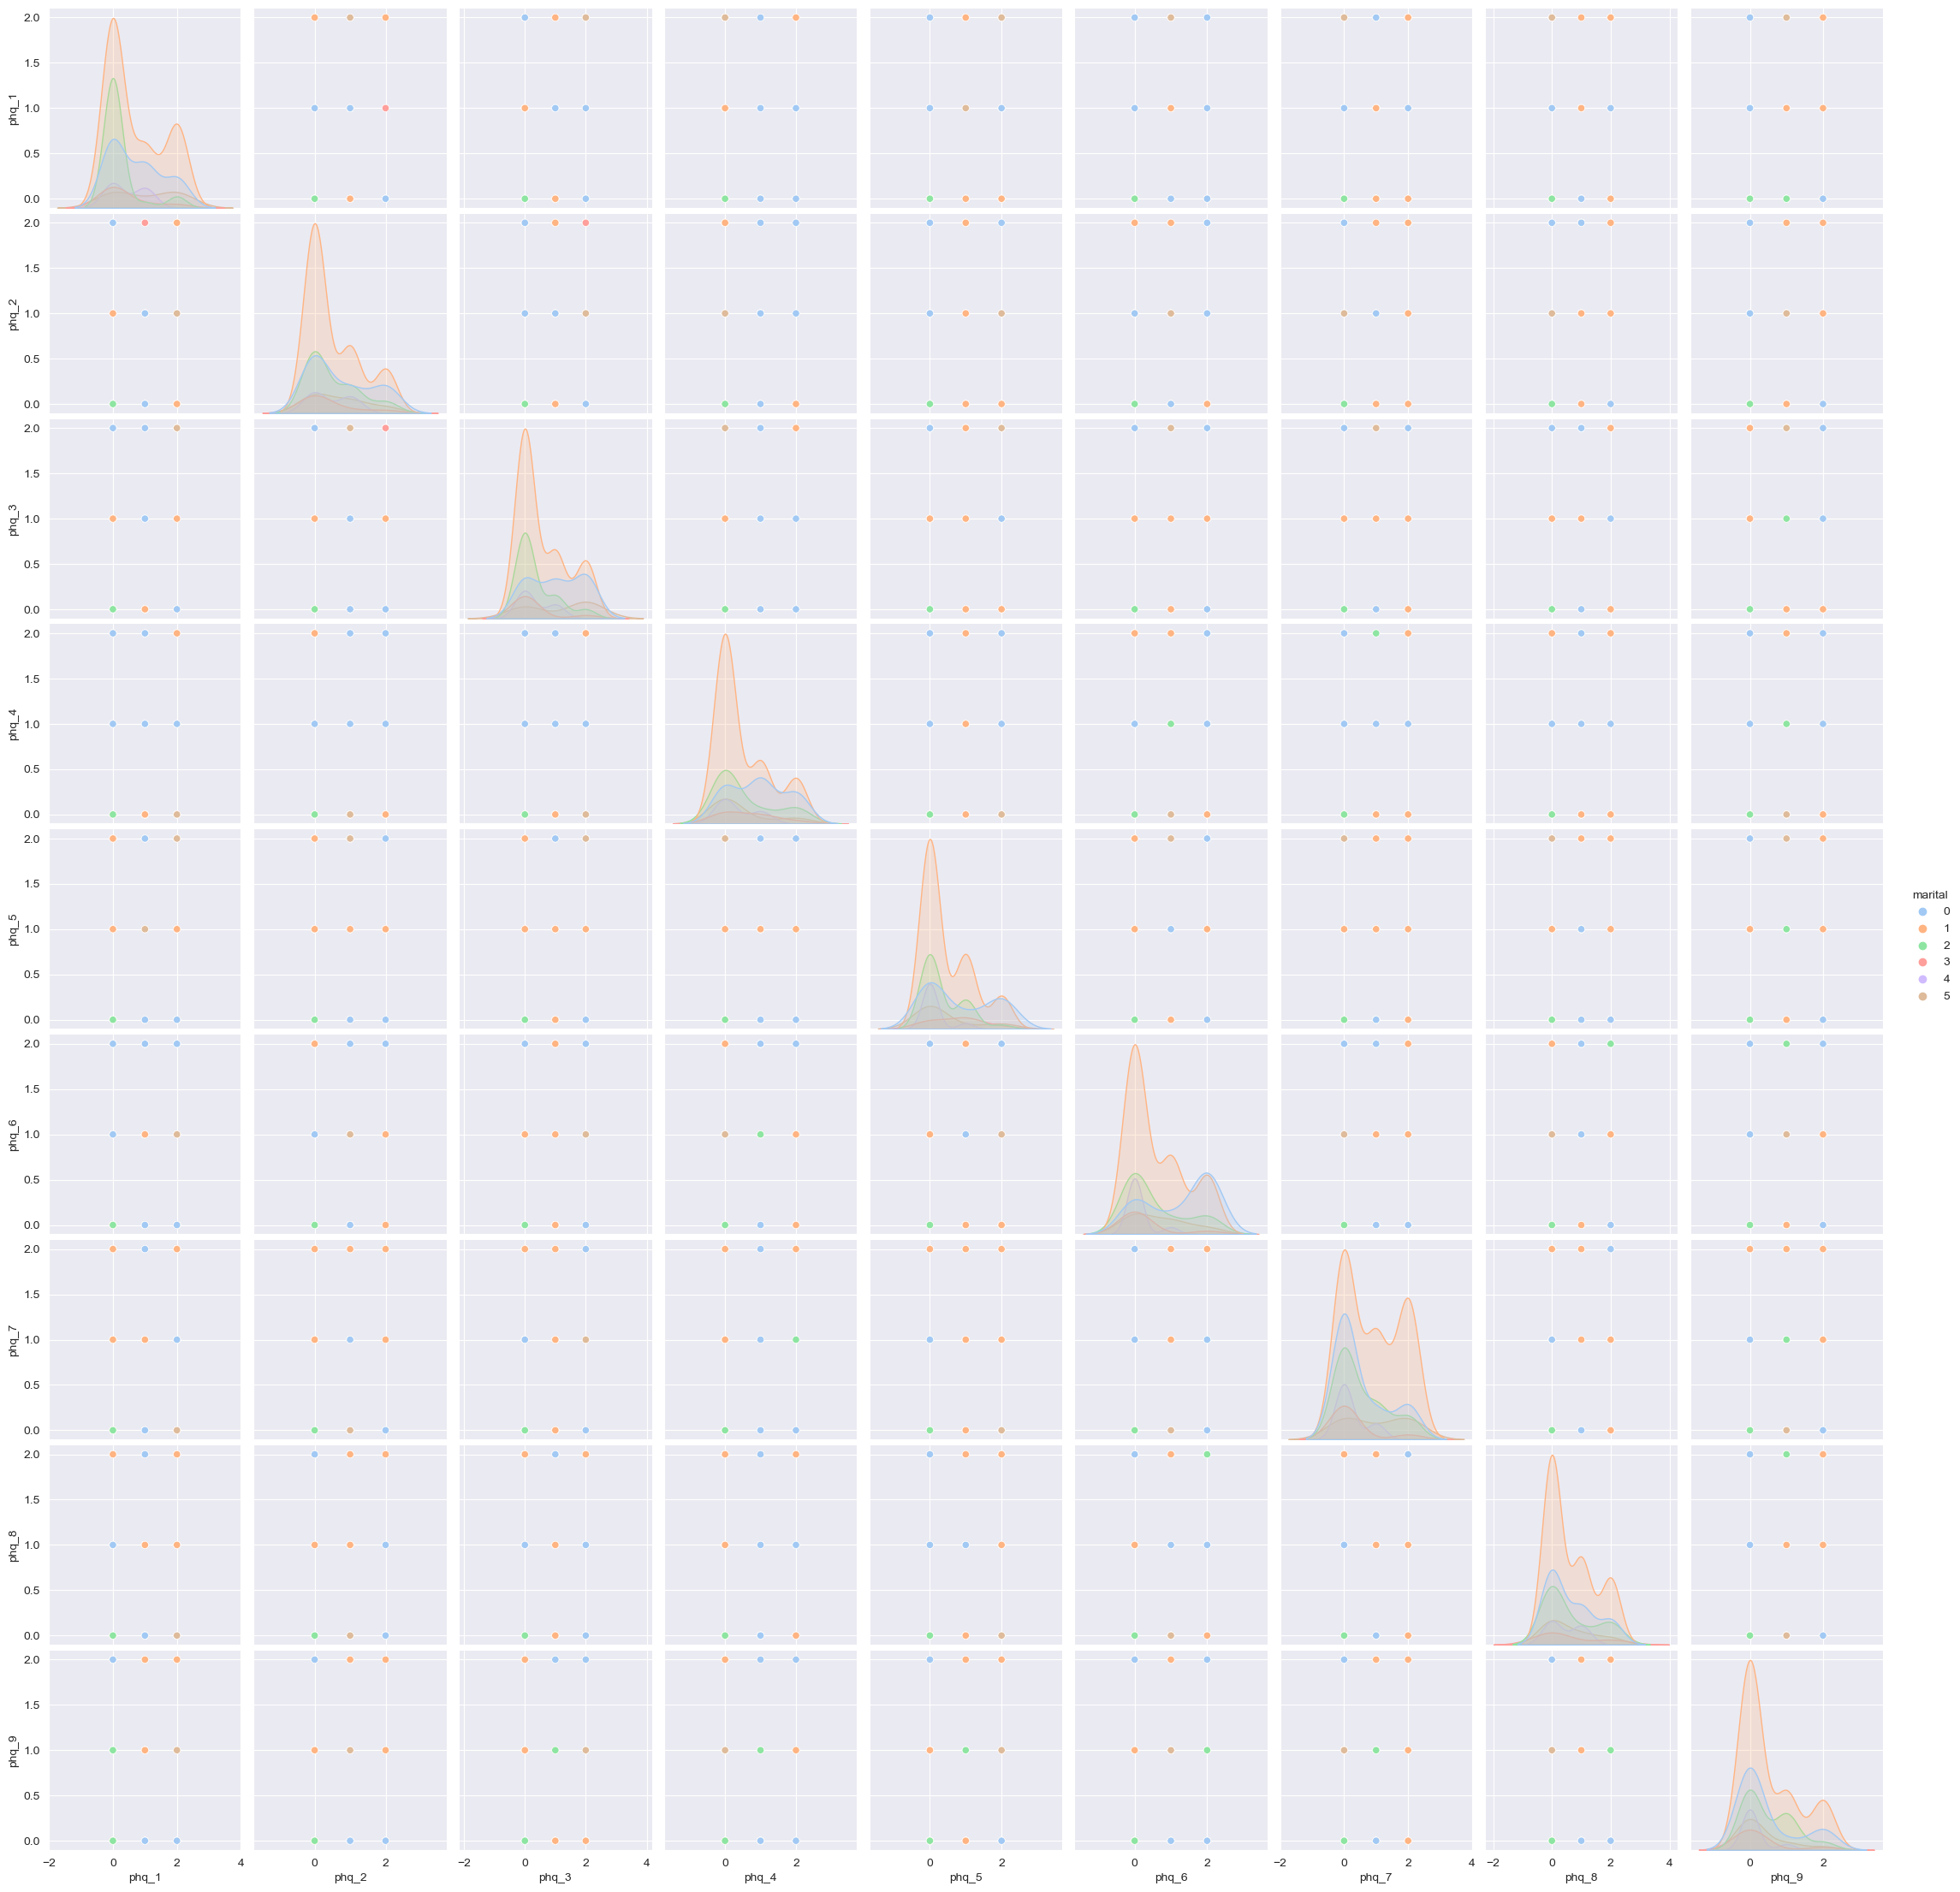

In [54]:
# multivariate analysis of marital and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'marital', palette = 'pastel')
plt.show()

# honestly don't think this analysis is actually worth BUT maybe married people with children may have a higher literacy than the people of the same age without kids (since kids usually tends to use technology more???)

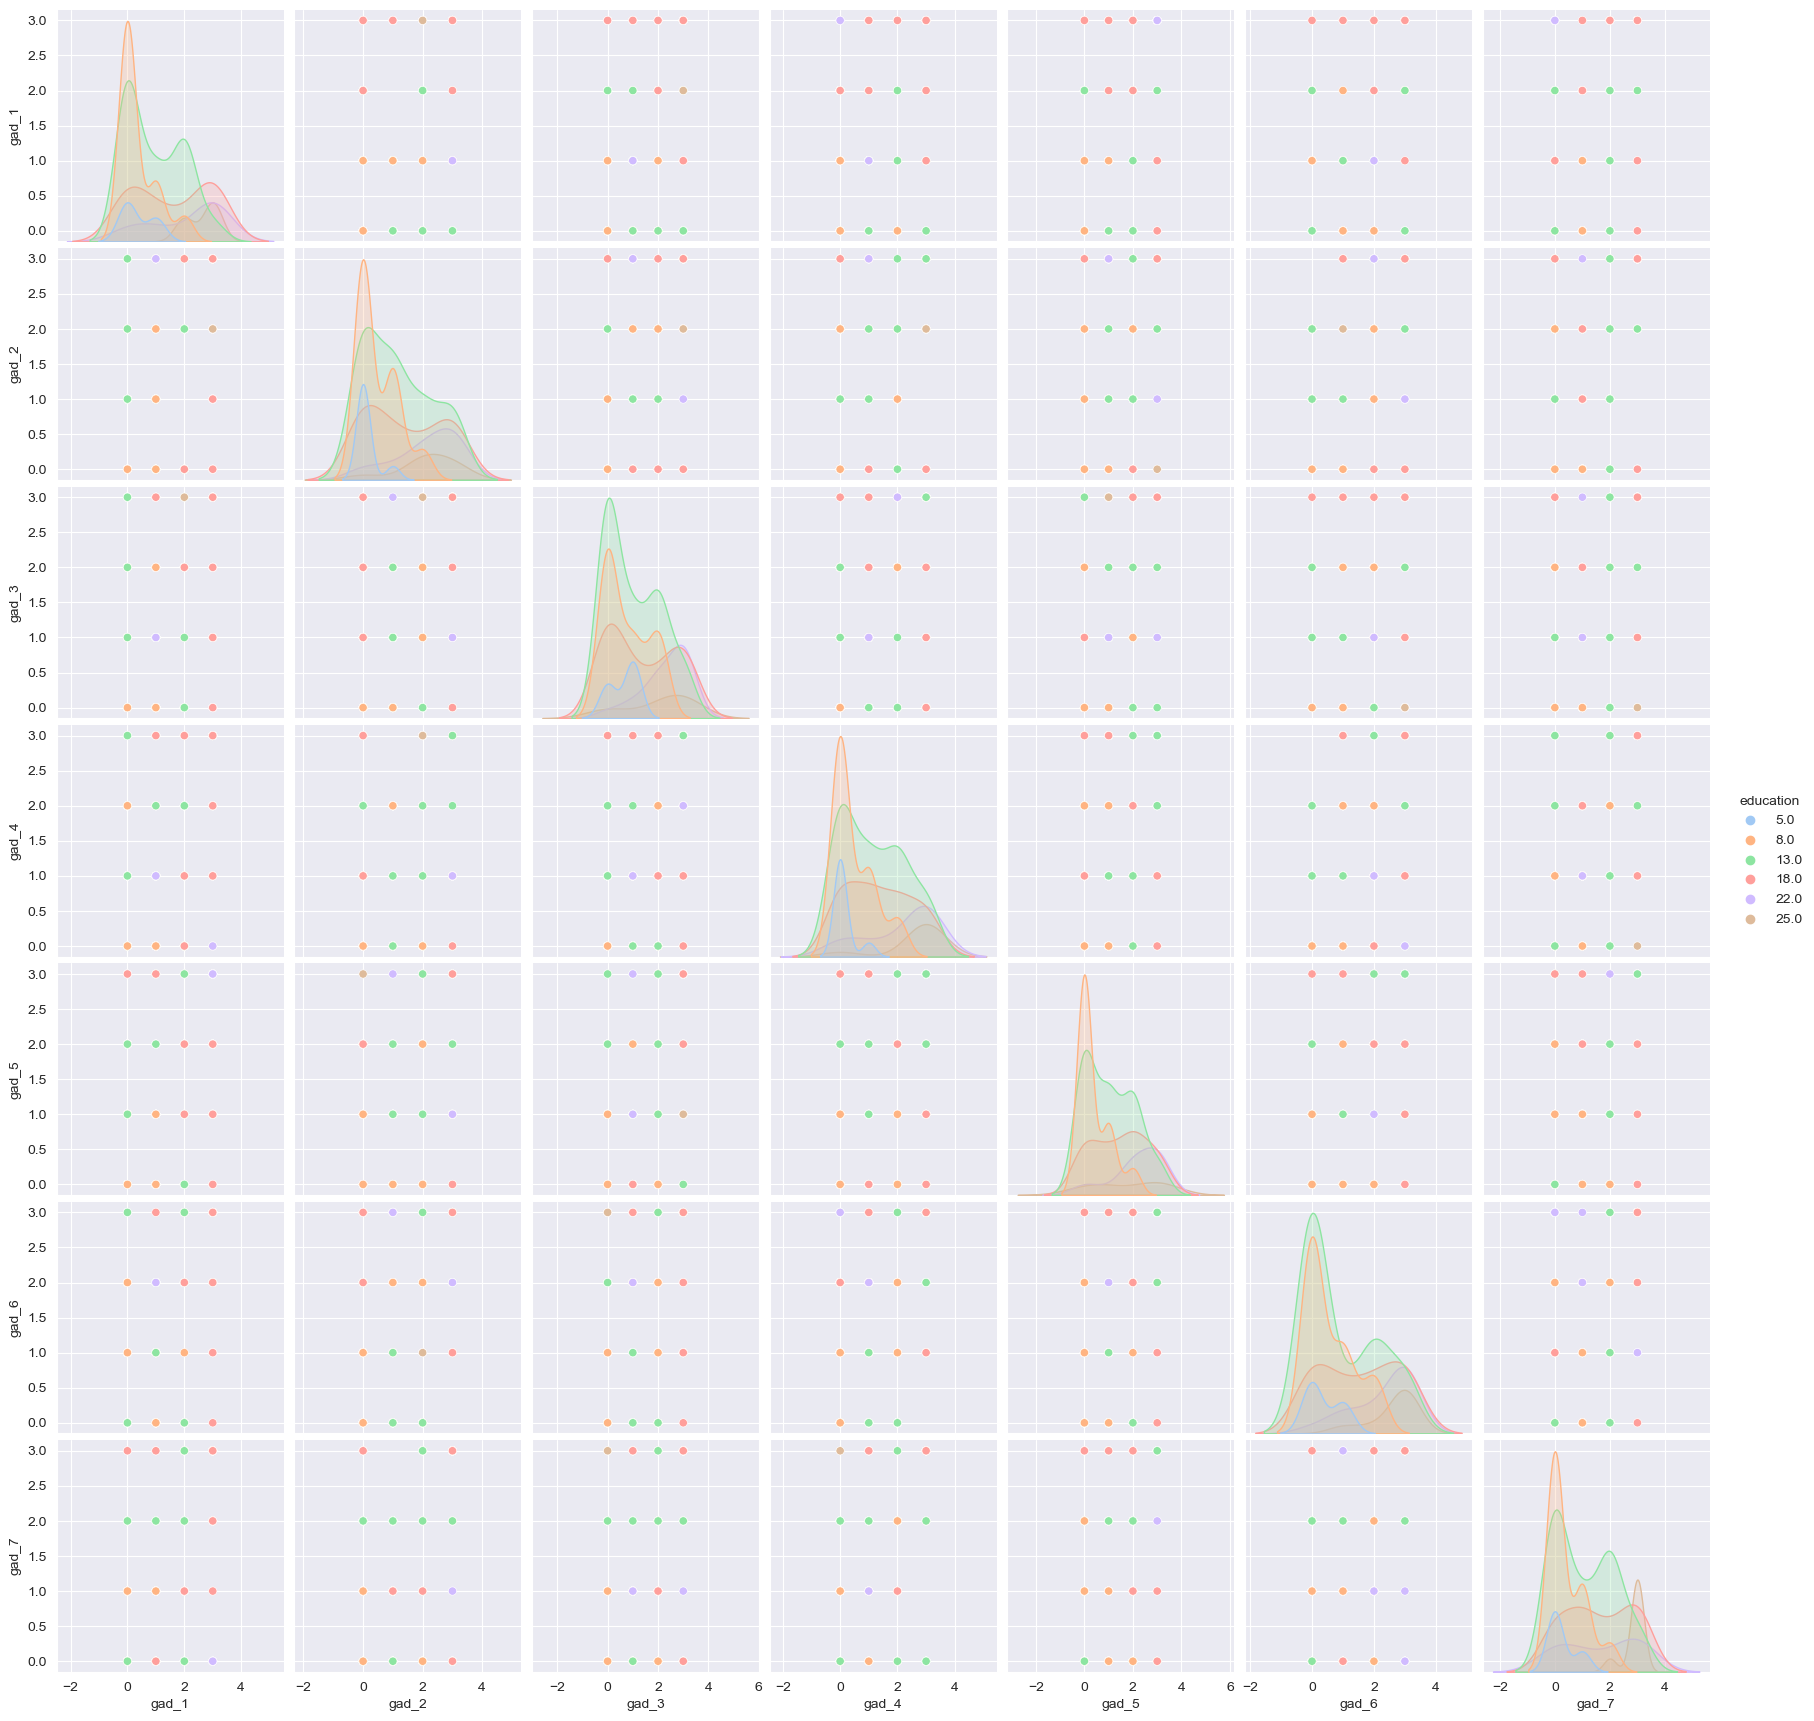

In [55]:
# multivariate analysis of education and features from gad
sns.pairplot(data, vars = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7'], hue = 'education', palette = 'pastel')
plt.show()
    

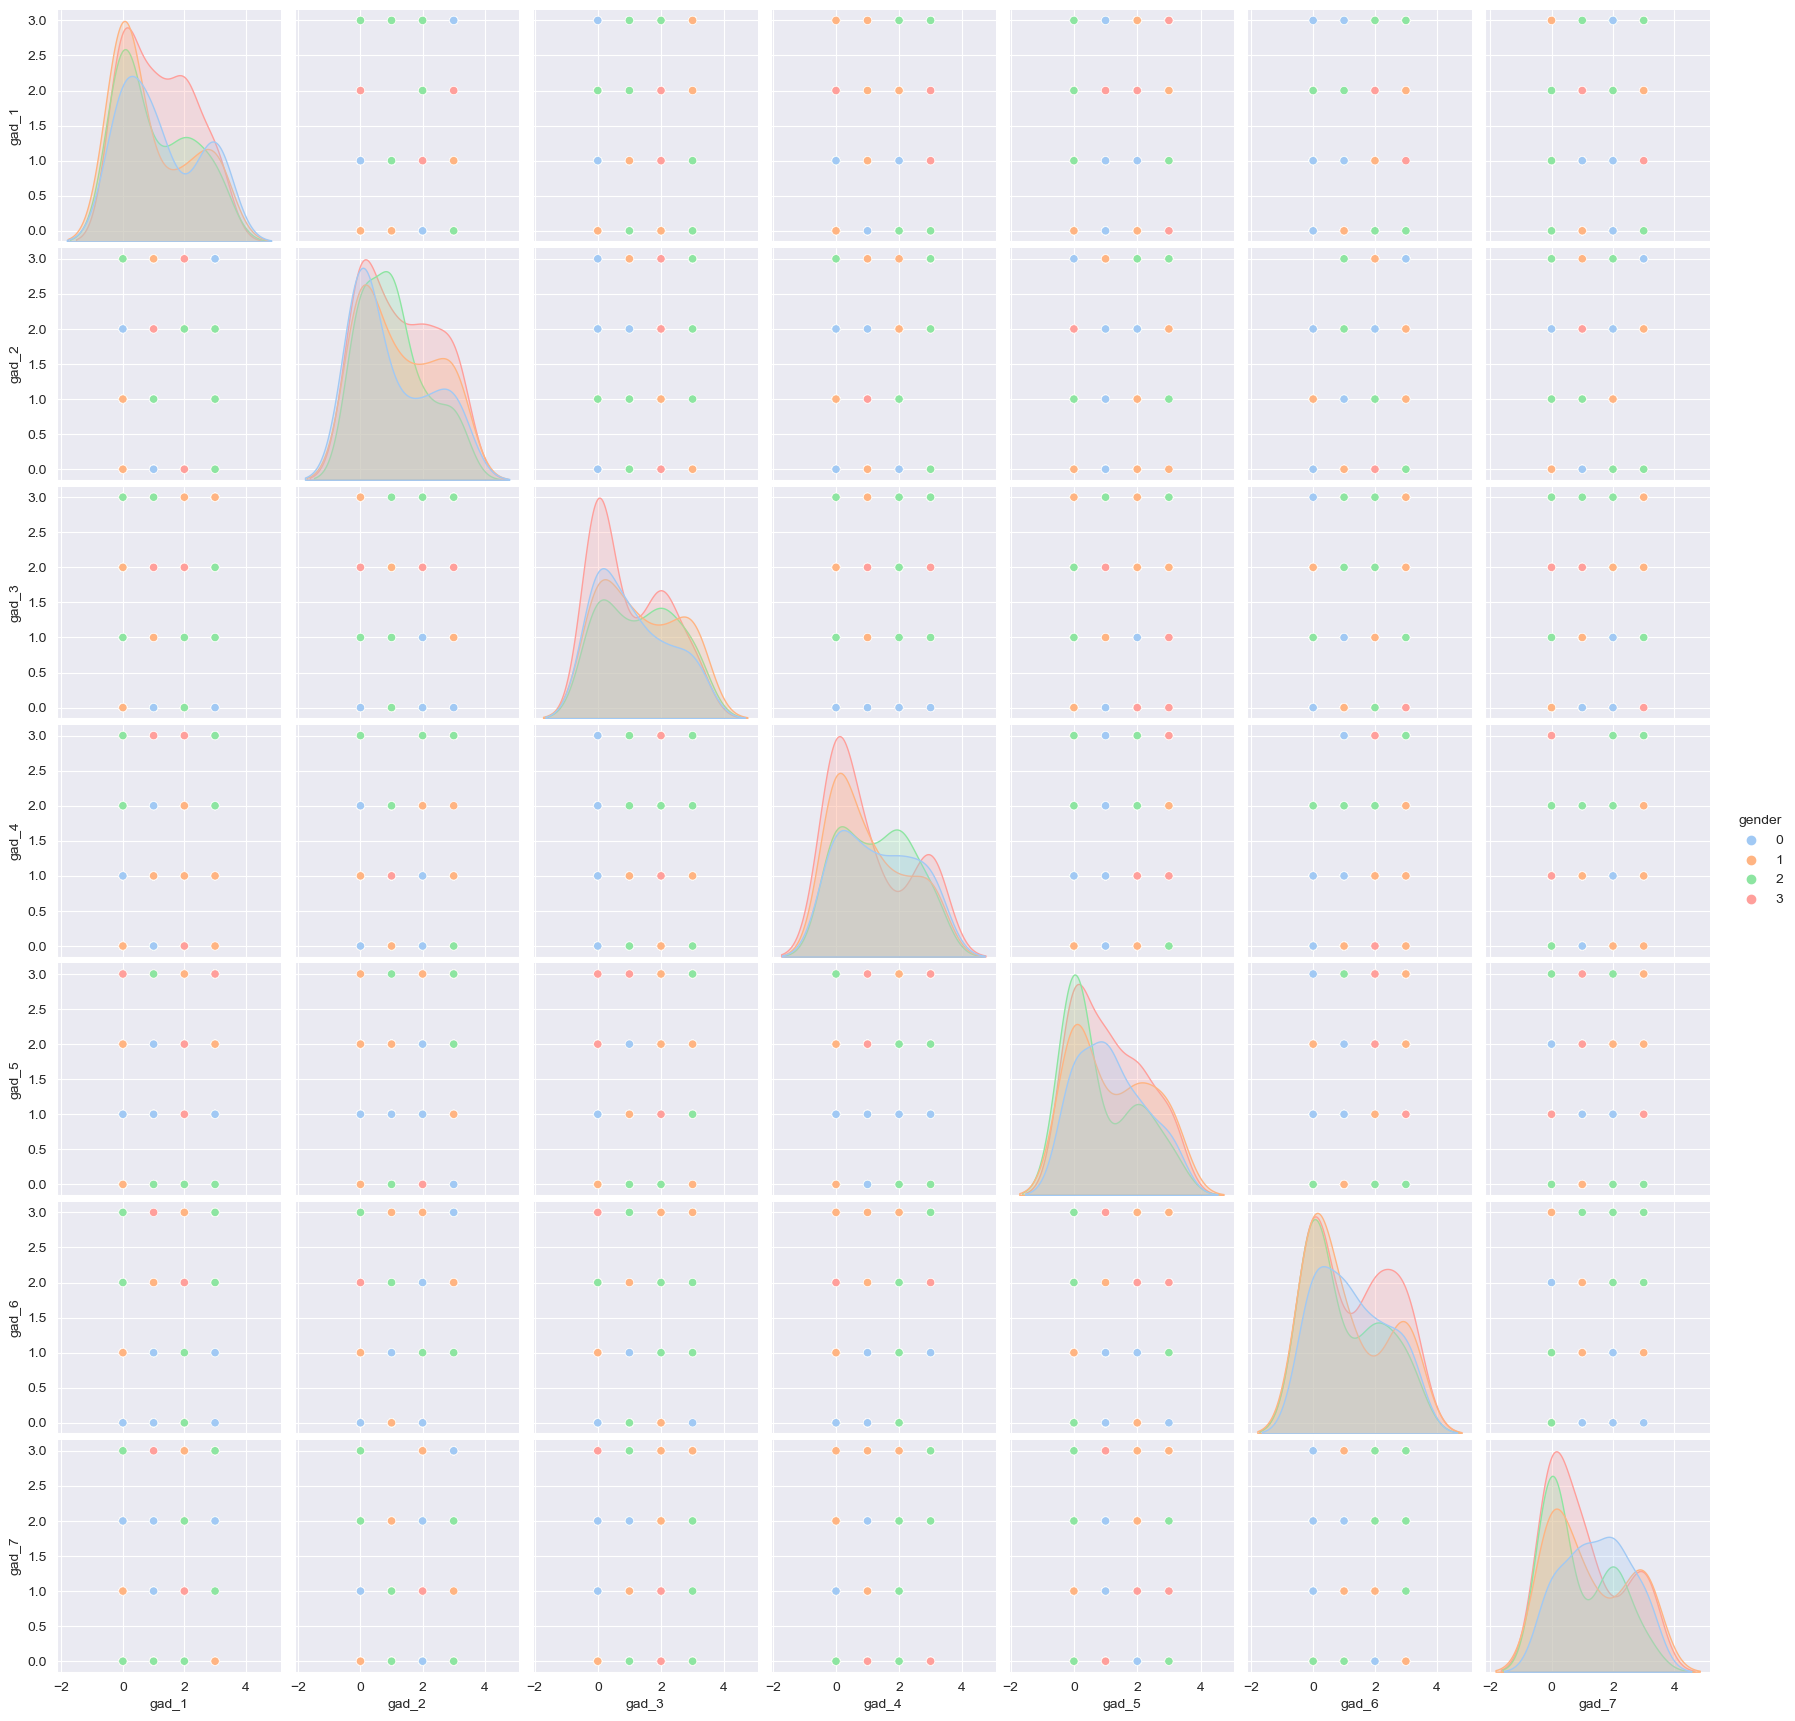

In [56]:
# multivariate analysis of gender and features from gad
sns.pairplot(data, vars = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7'], hue = 'gender', palette = 'pastel')
plt.show()

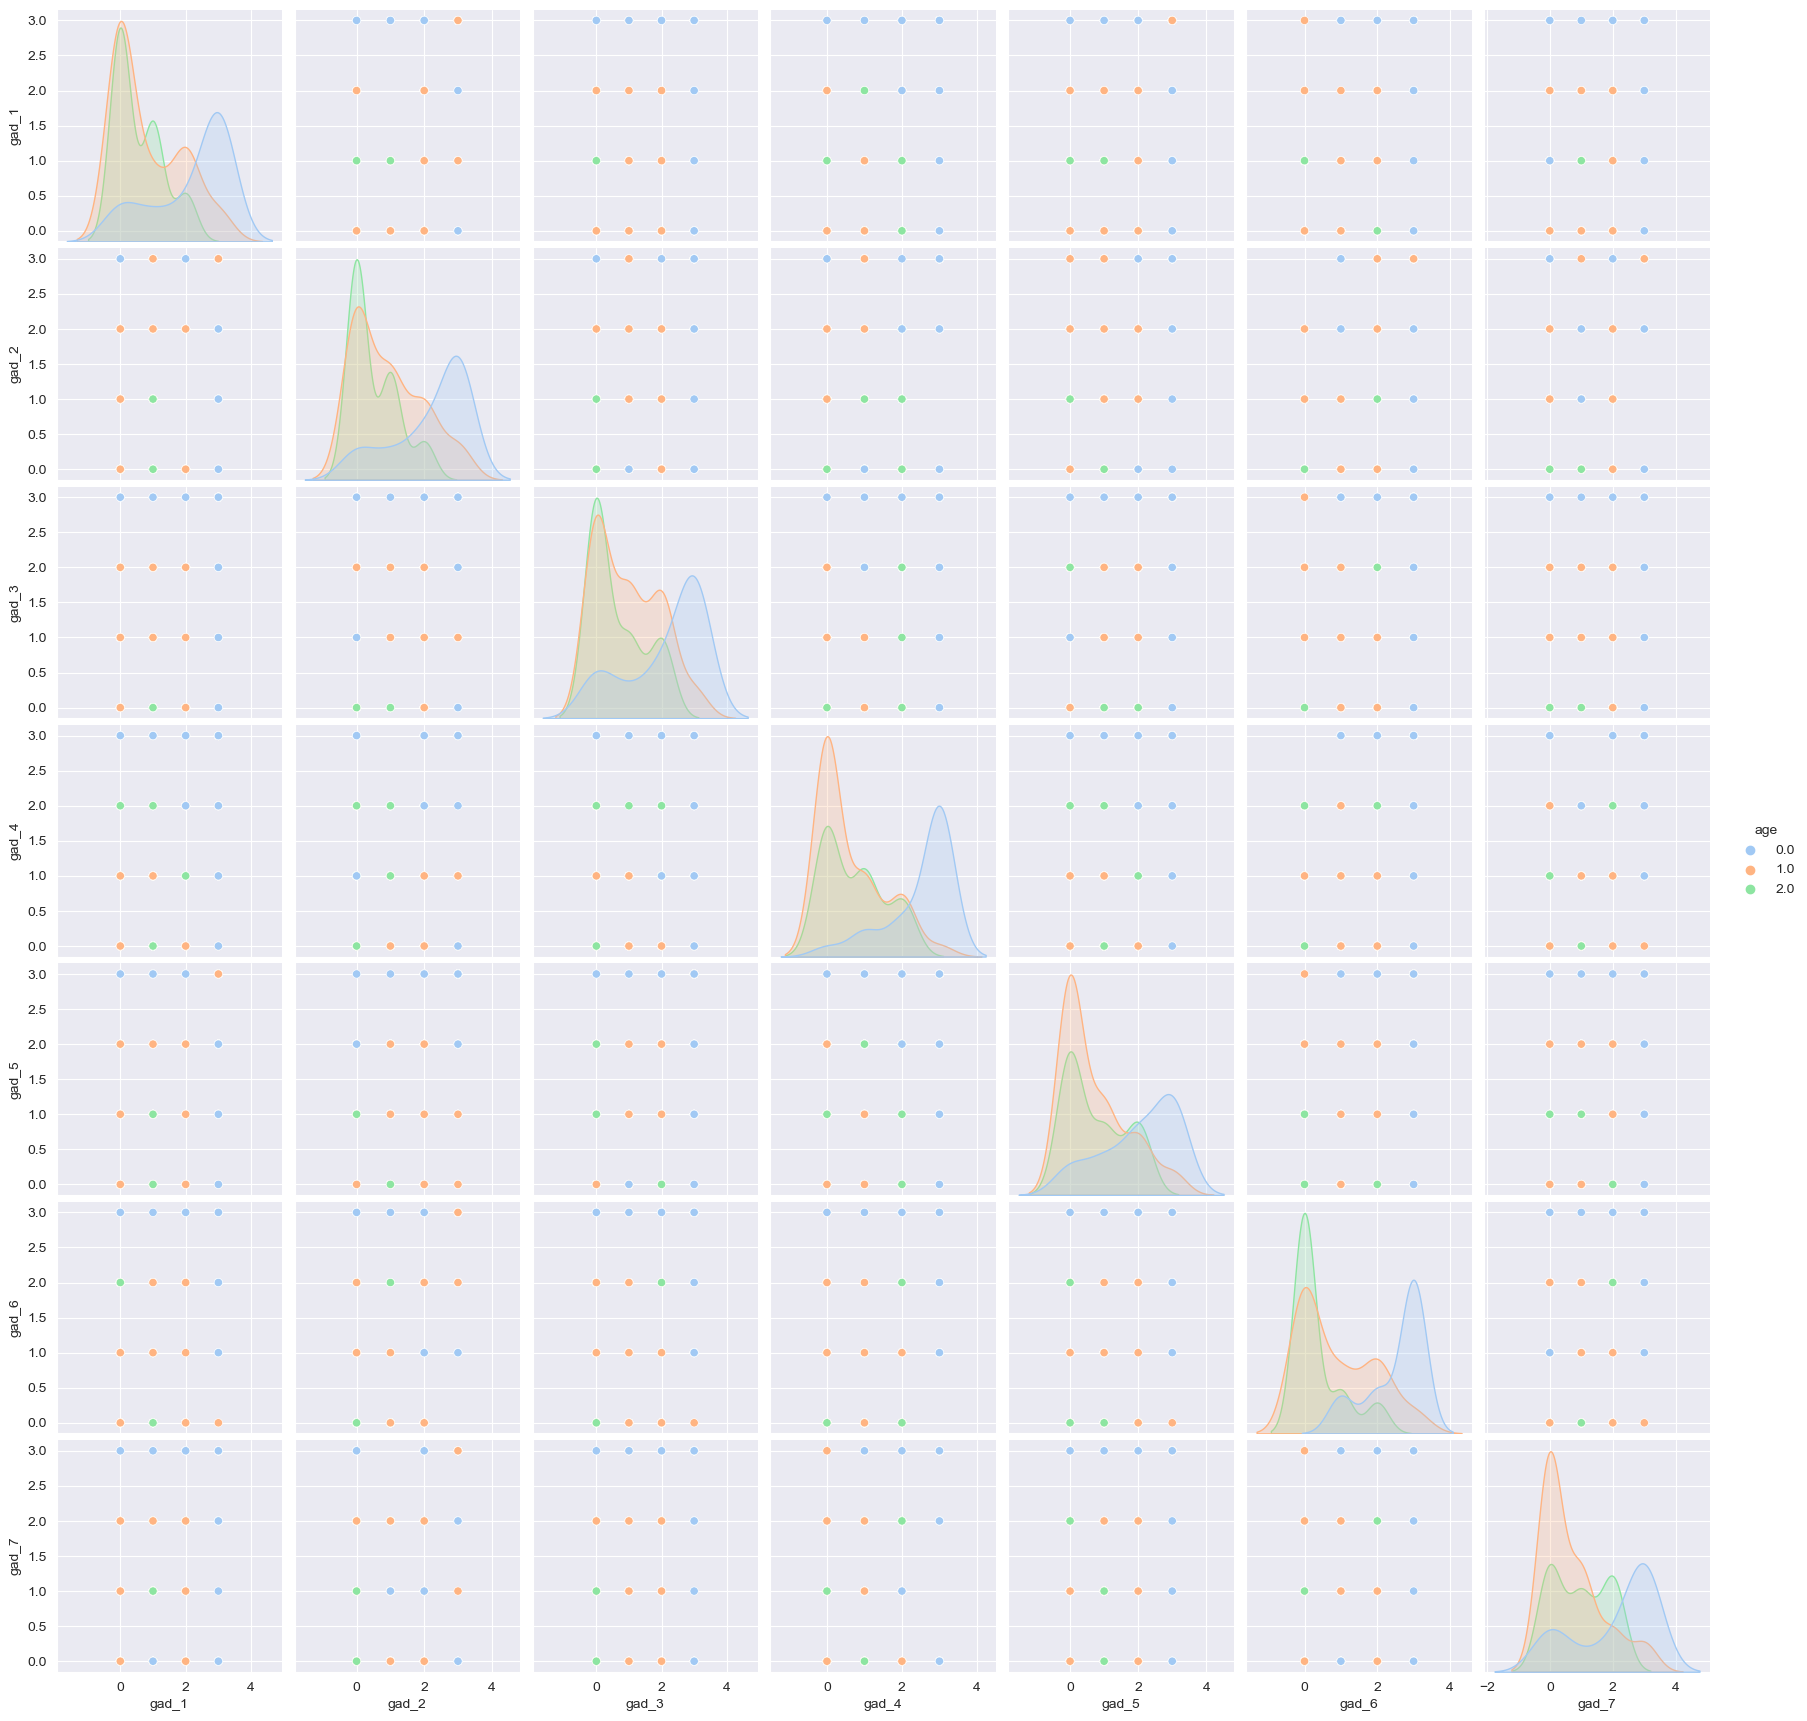

In [57]:
# multivariate analysis of age and features from gad
sns.pairplot(data, vars = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7'], hue = 'age', palette = 'pastel')
plt.show()

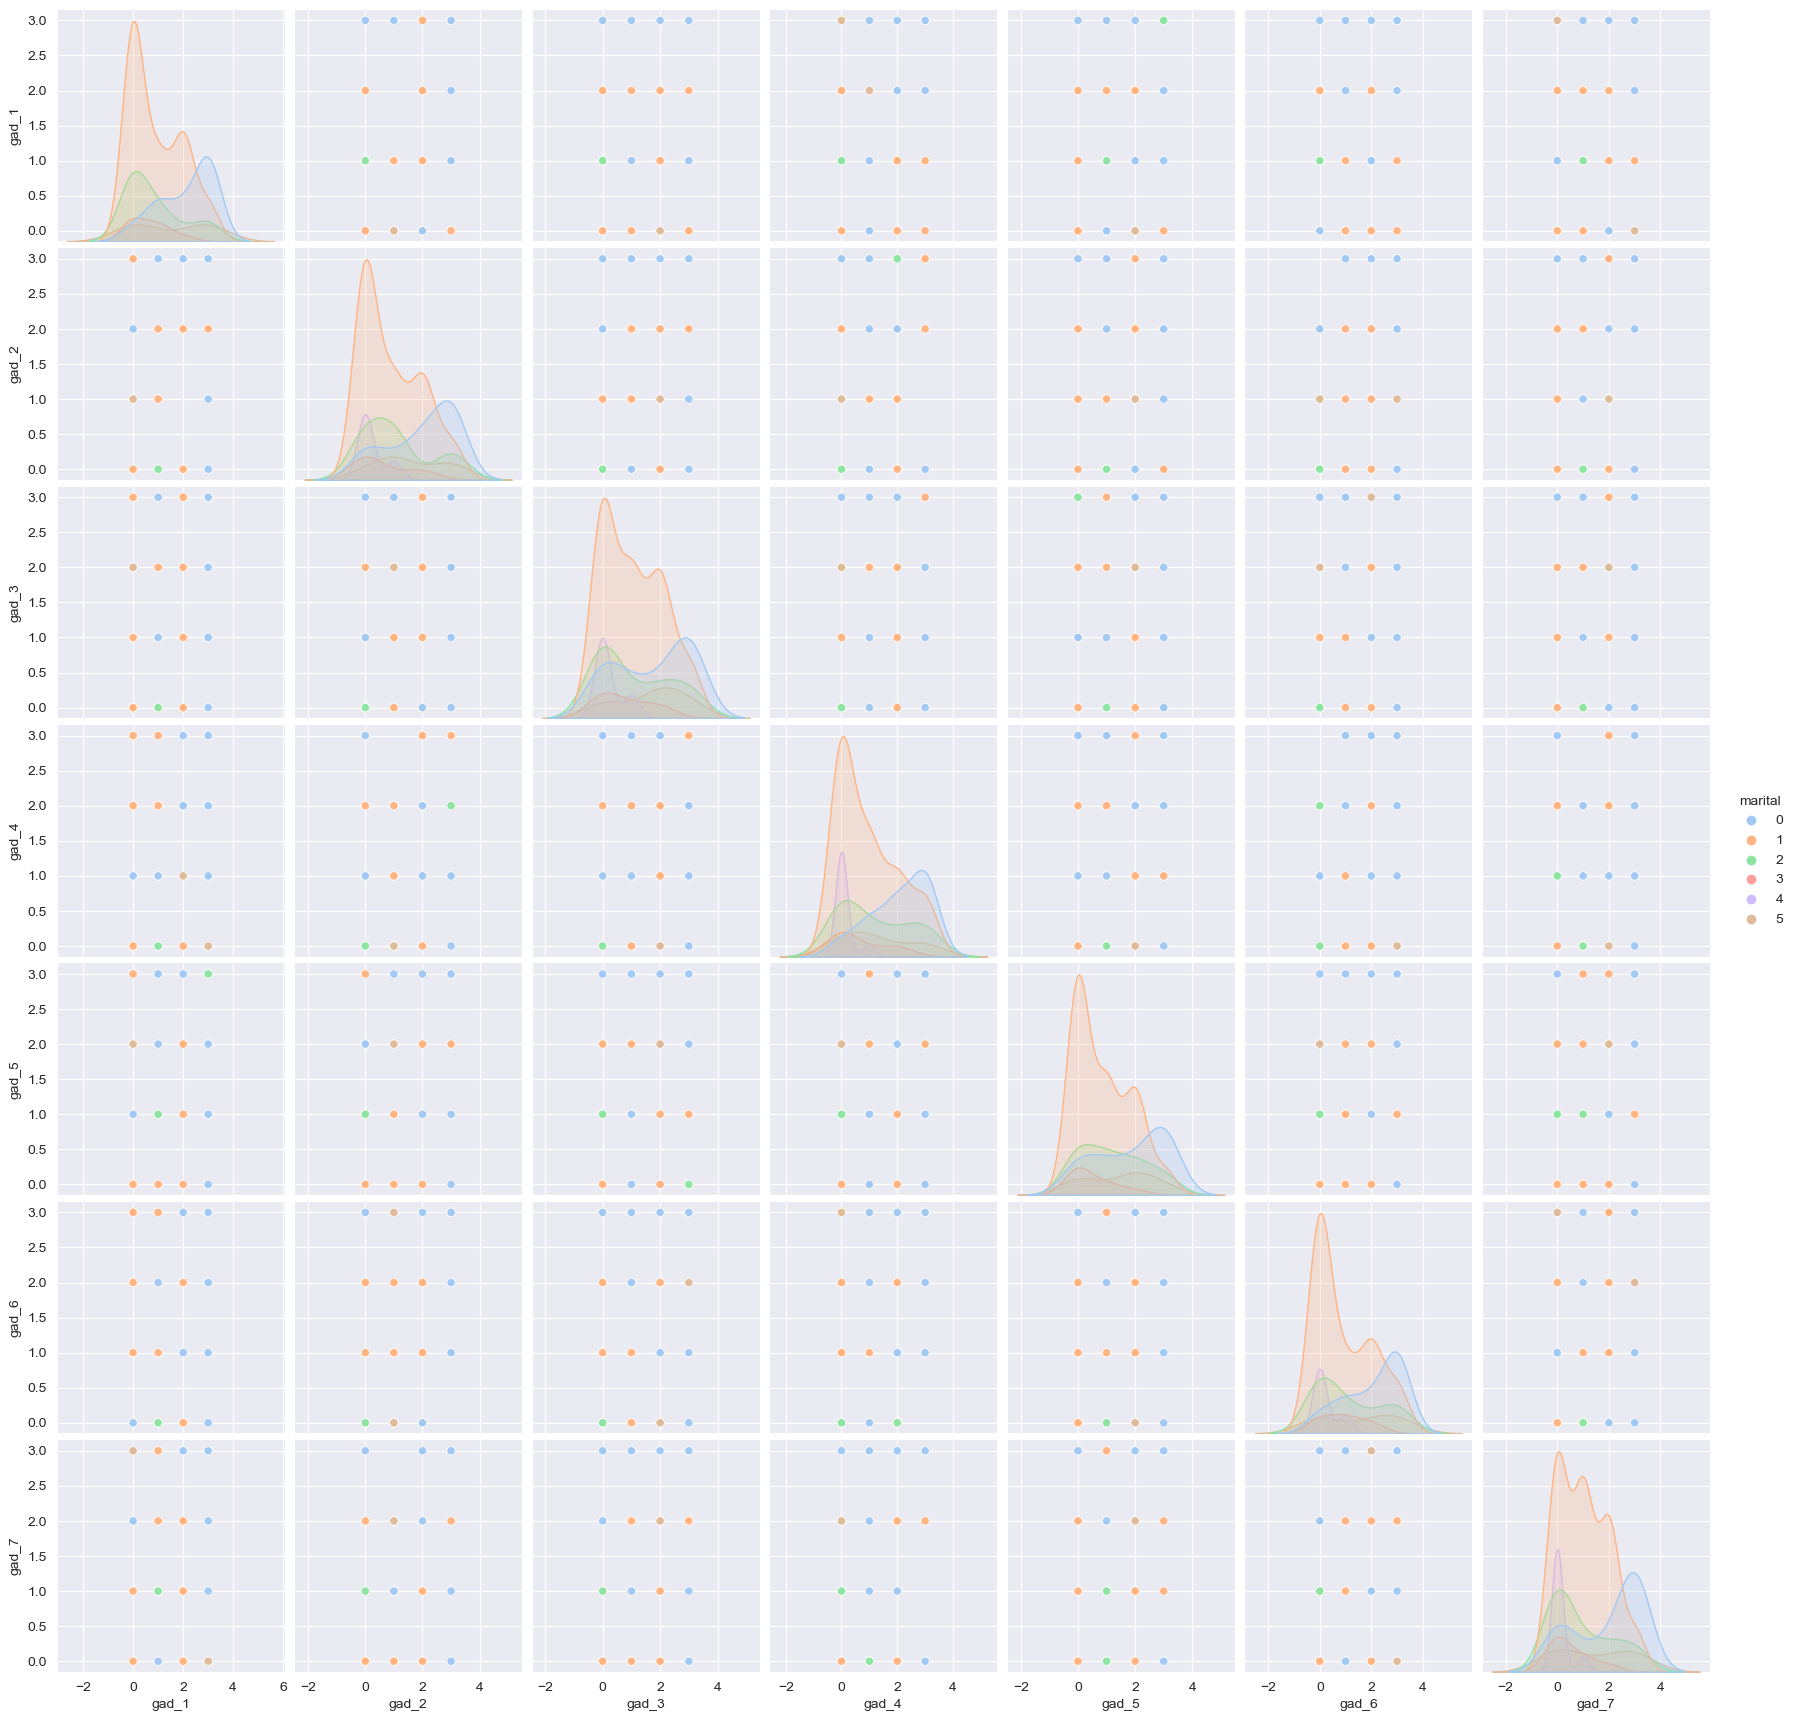

In [58]:
# multivariate analysis of marital and features from gad
sns.pairplot(data, vars = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7'], hue = 'marital', palette = 'pastel')
plt.show()

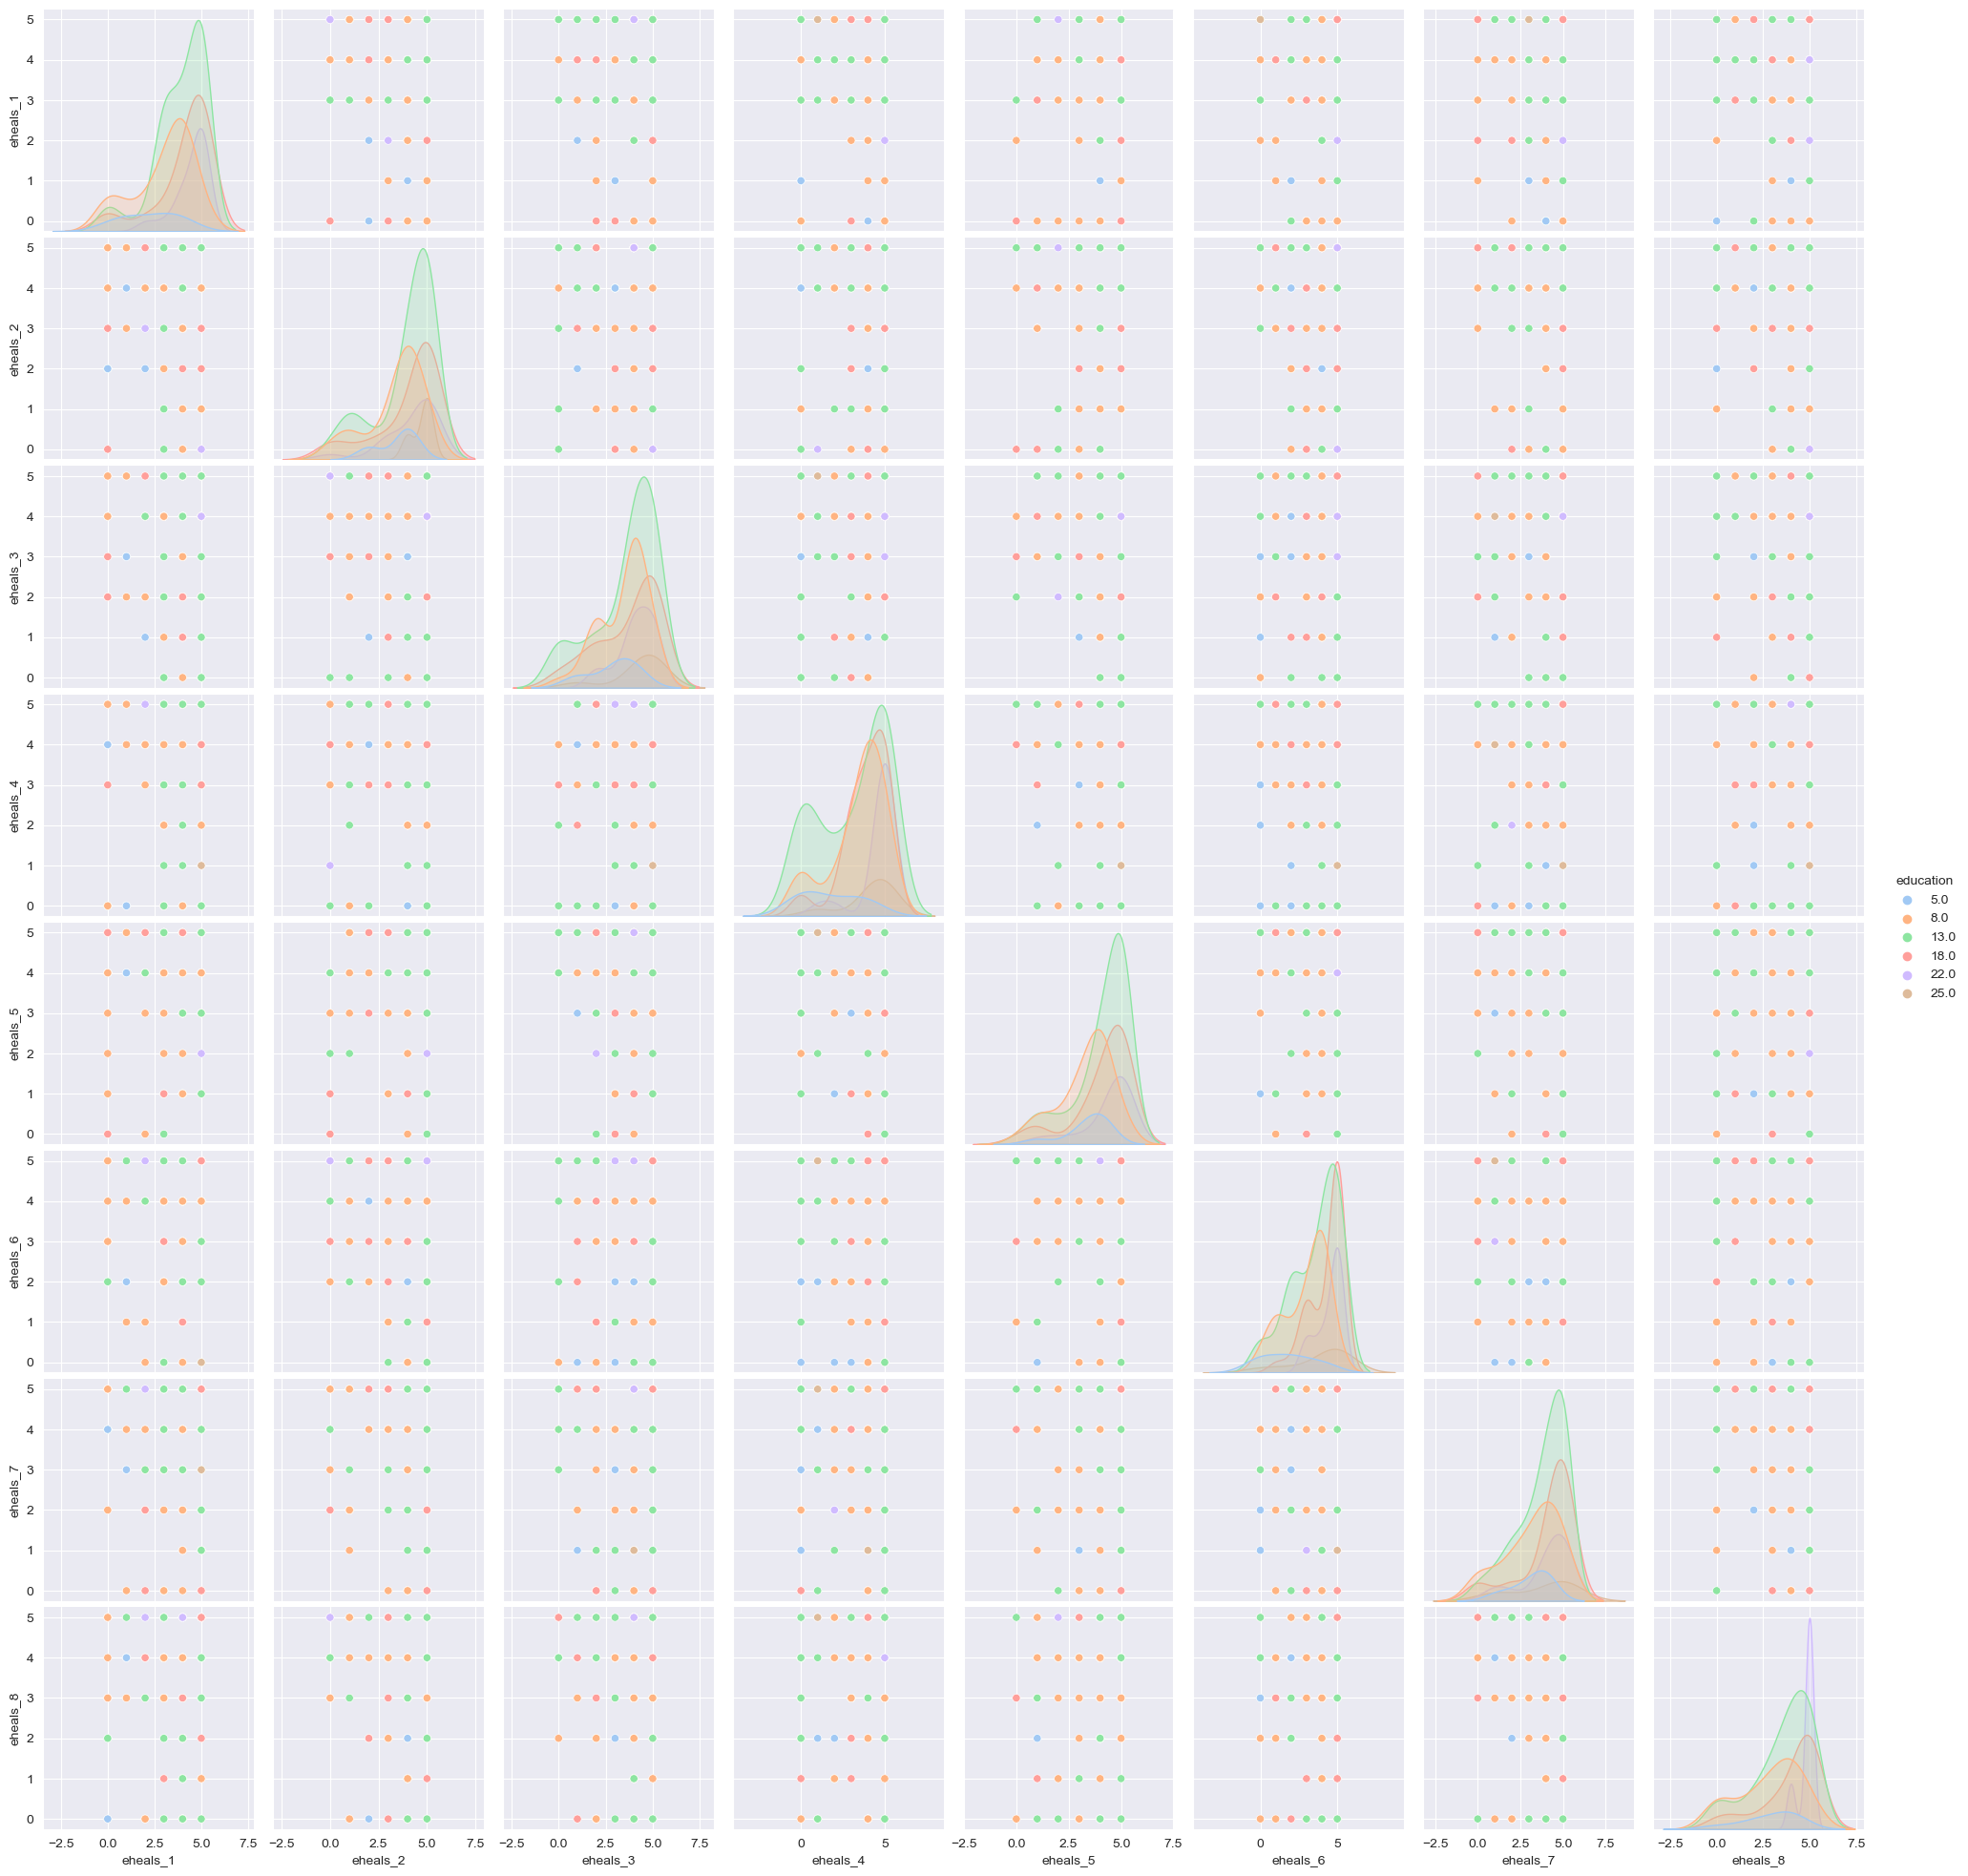

In [59]:
# multivariate analysis of education and features from eheals
sns.pairplot(data, vars = ['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8'], hue = 'education', palette = 'pastel')
plt.show()

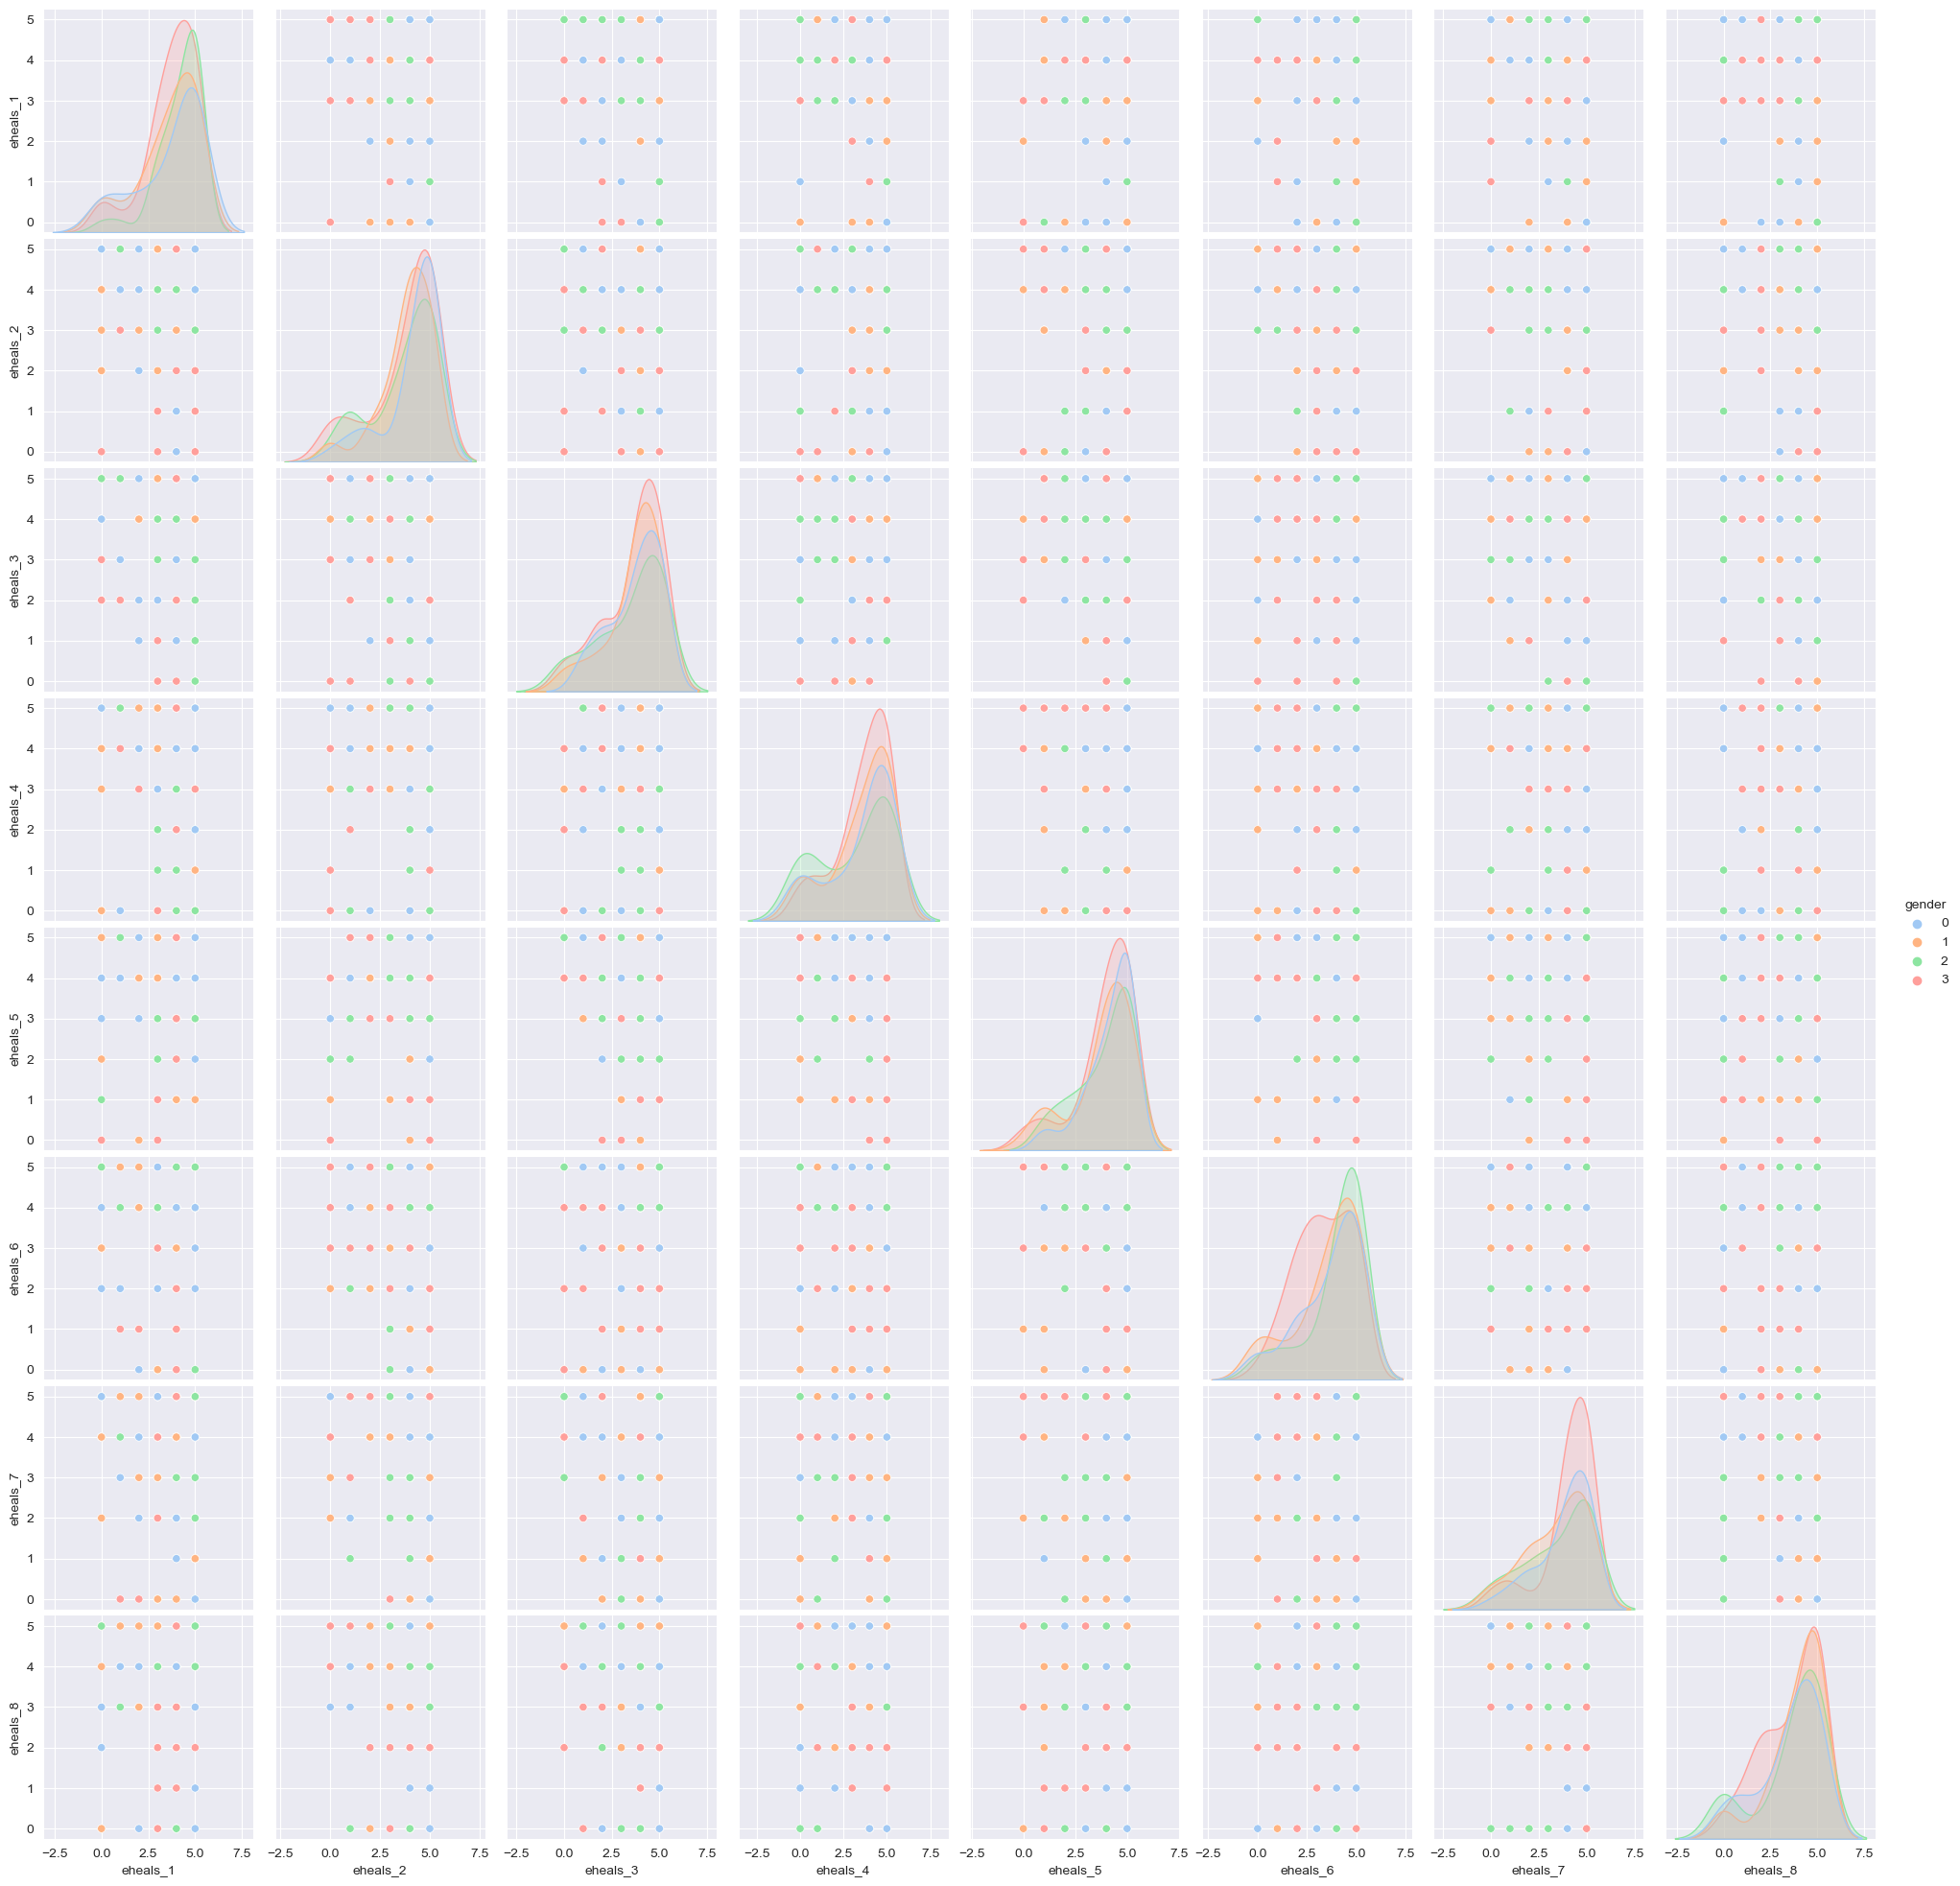

In [60]:
# multivariate analysis of gender and features from eheals
sns.pairplot(data,
             vars=['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8'],
             hue='gender', palette='pastel')
plt.show()

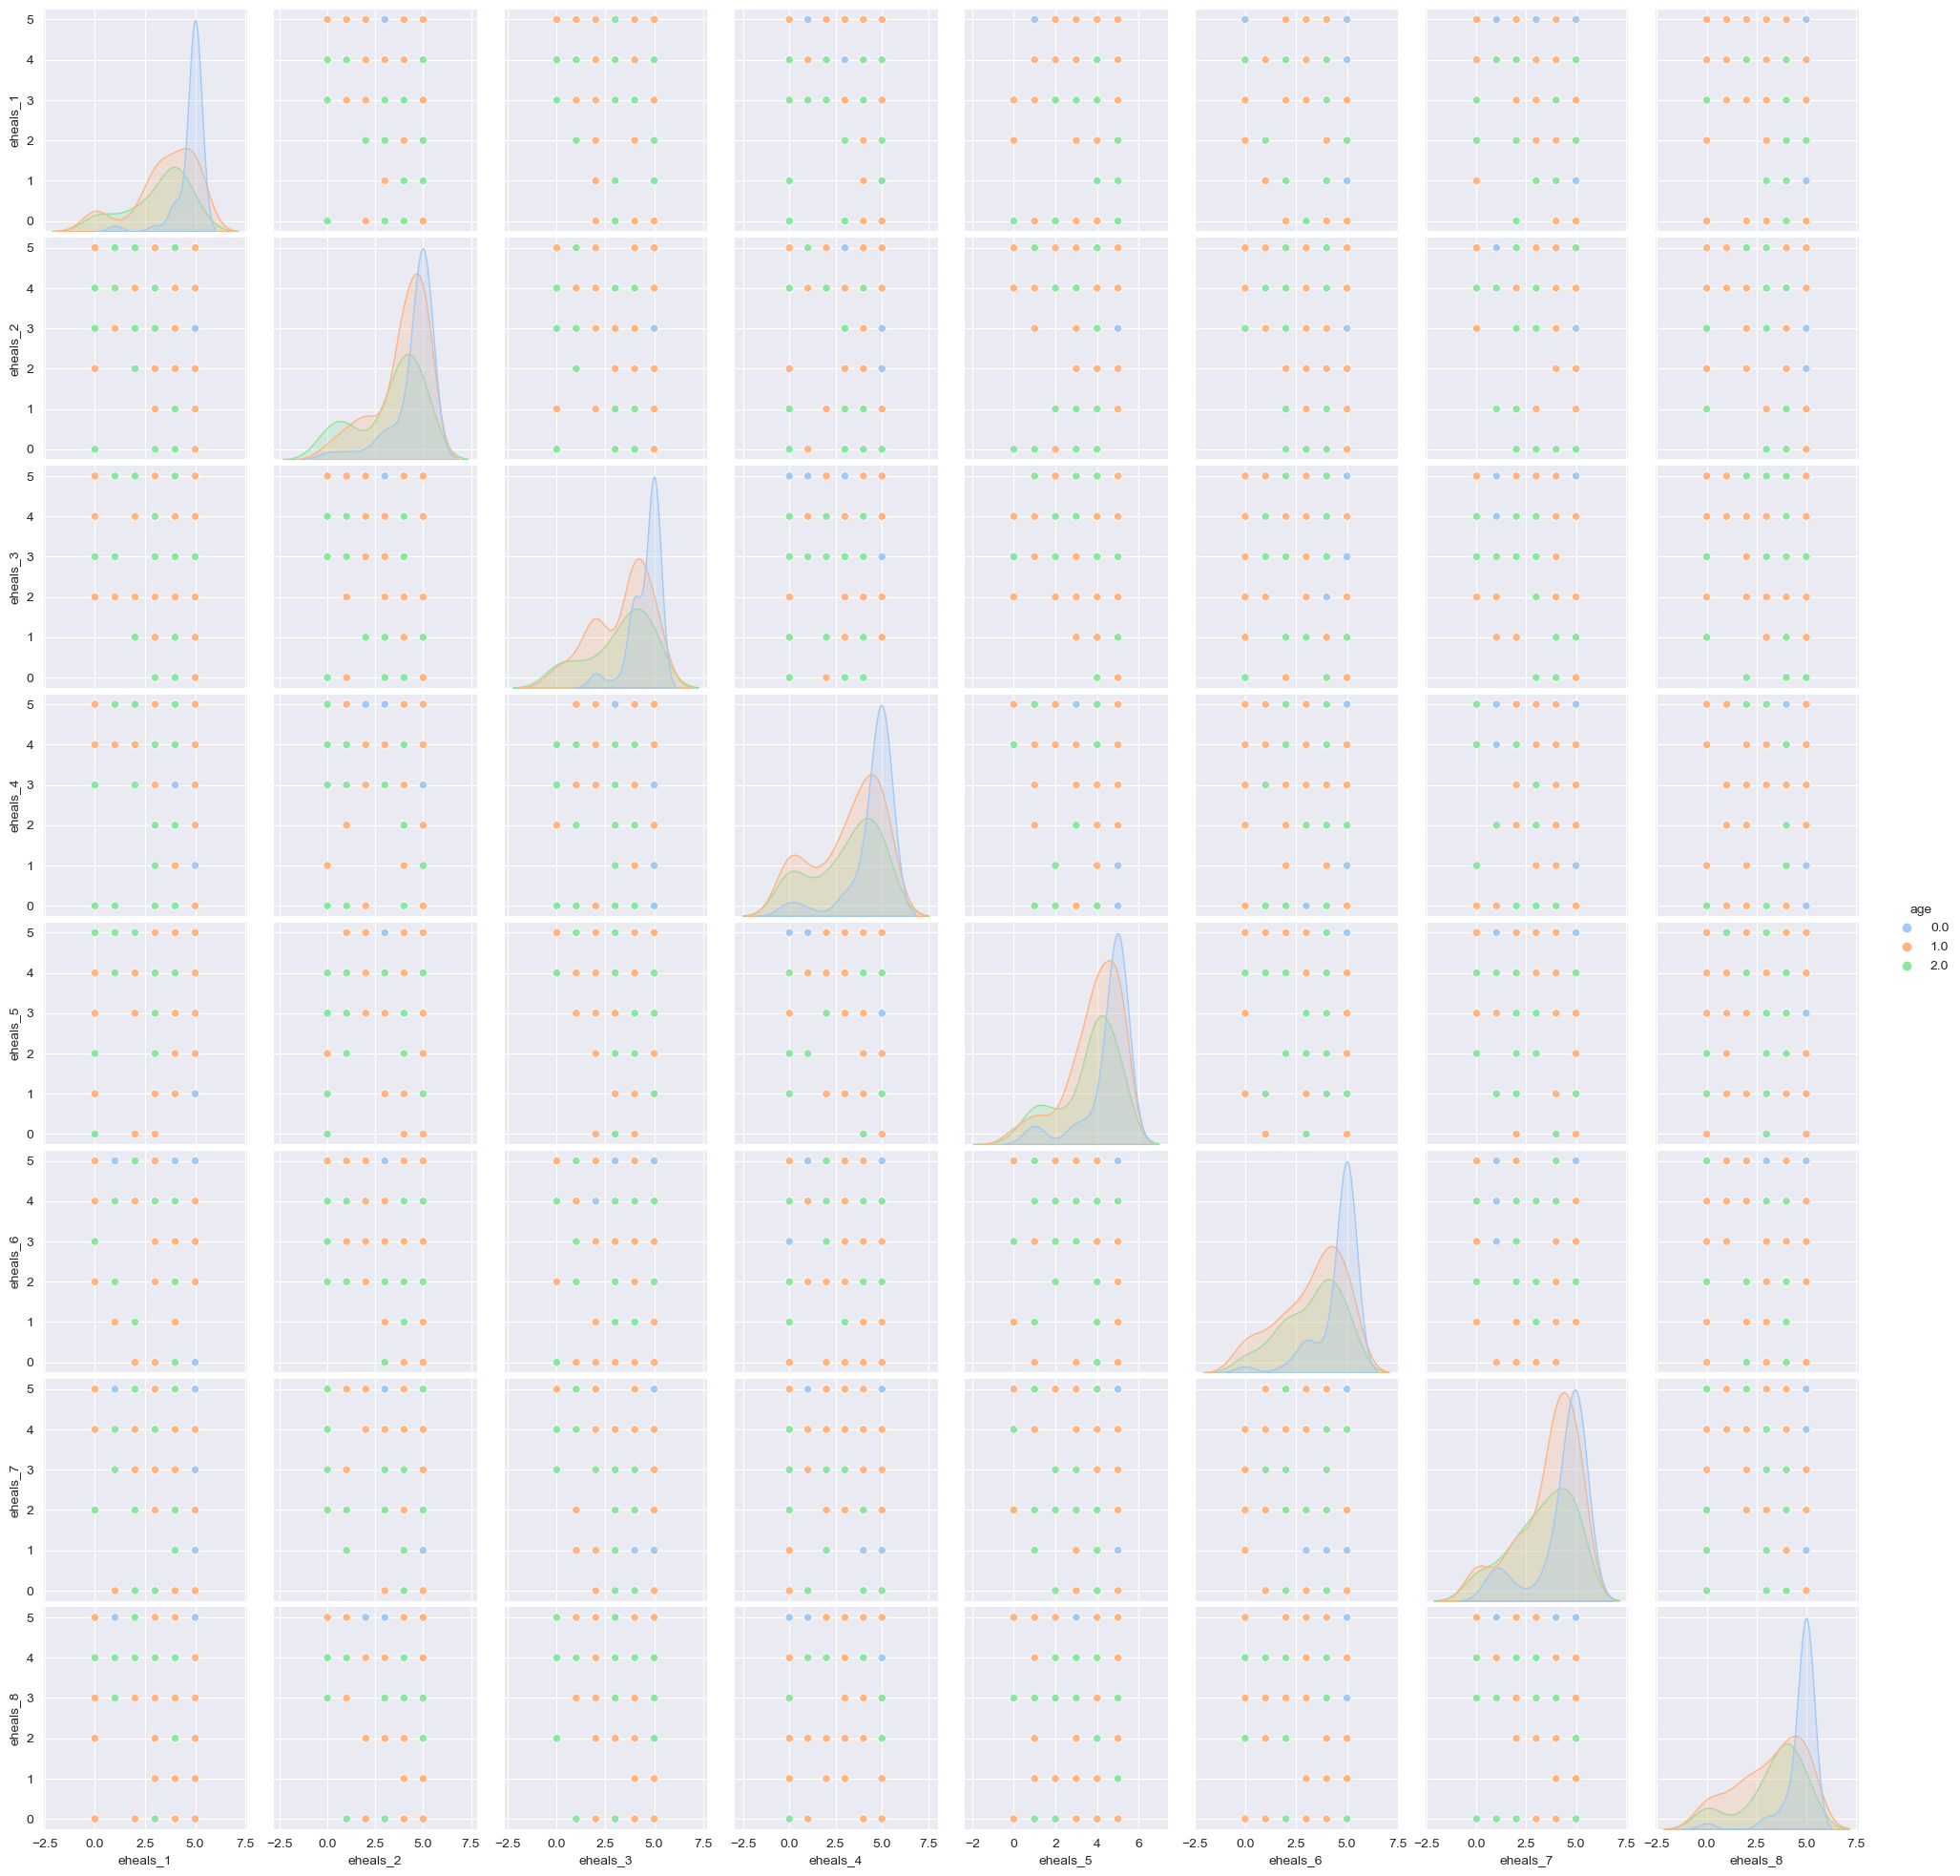

In [61]:
# multivariate analysis of age and features from eheals
sns.pairplot(data,
             vars=['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8'],
             hue='age', palette='pastel')
plt.show()

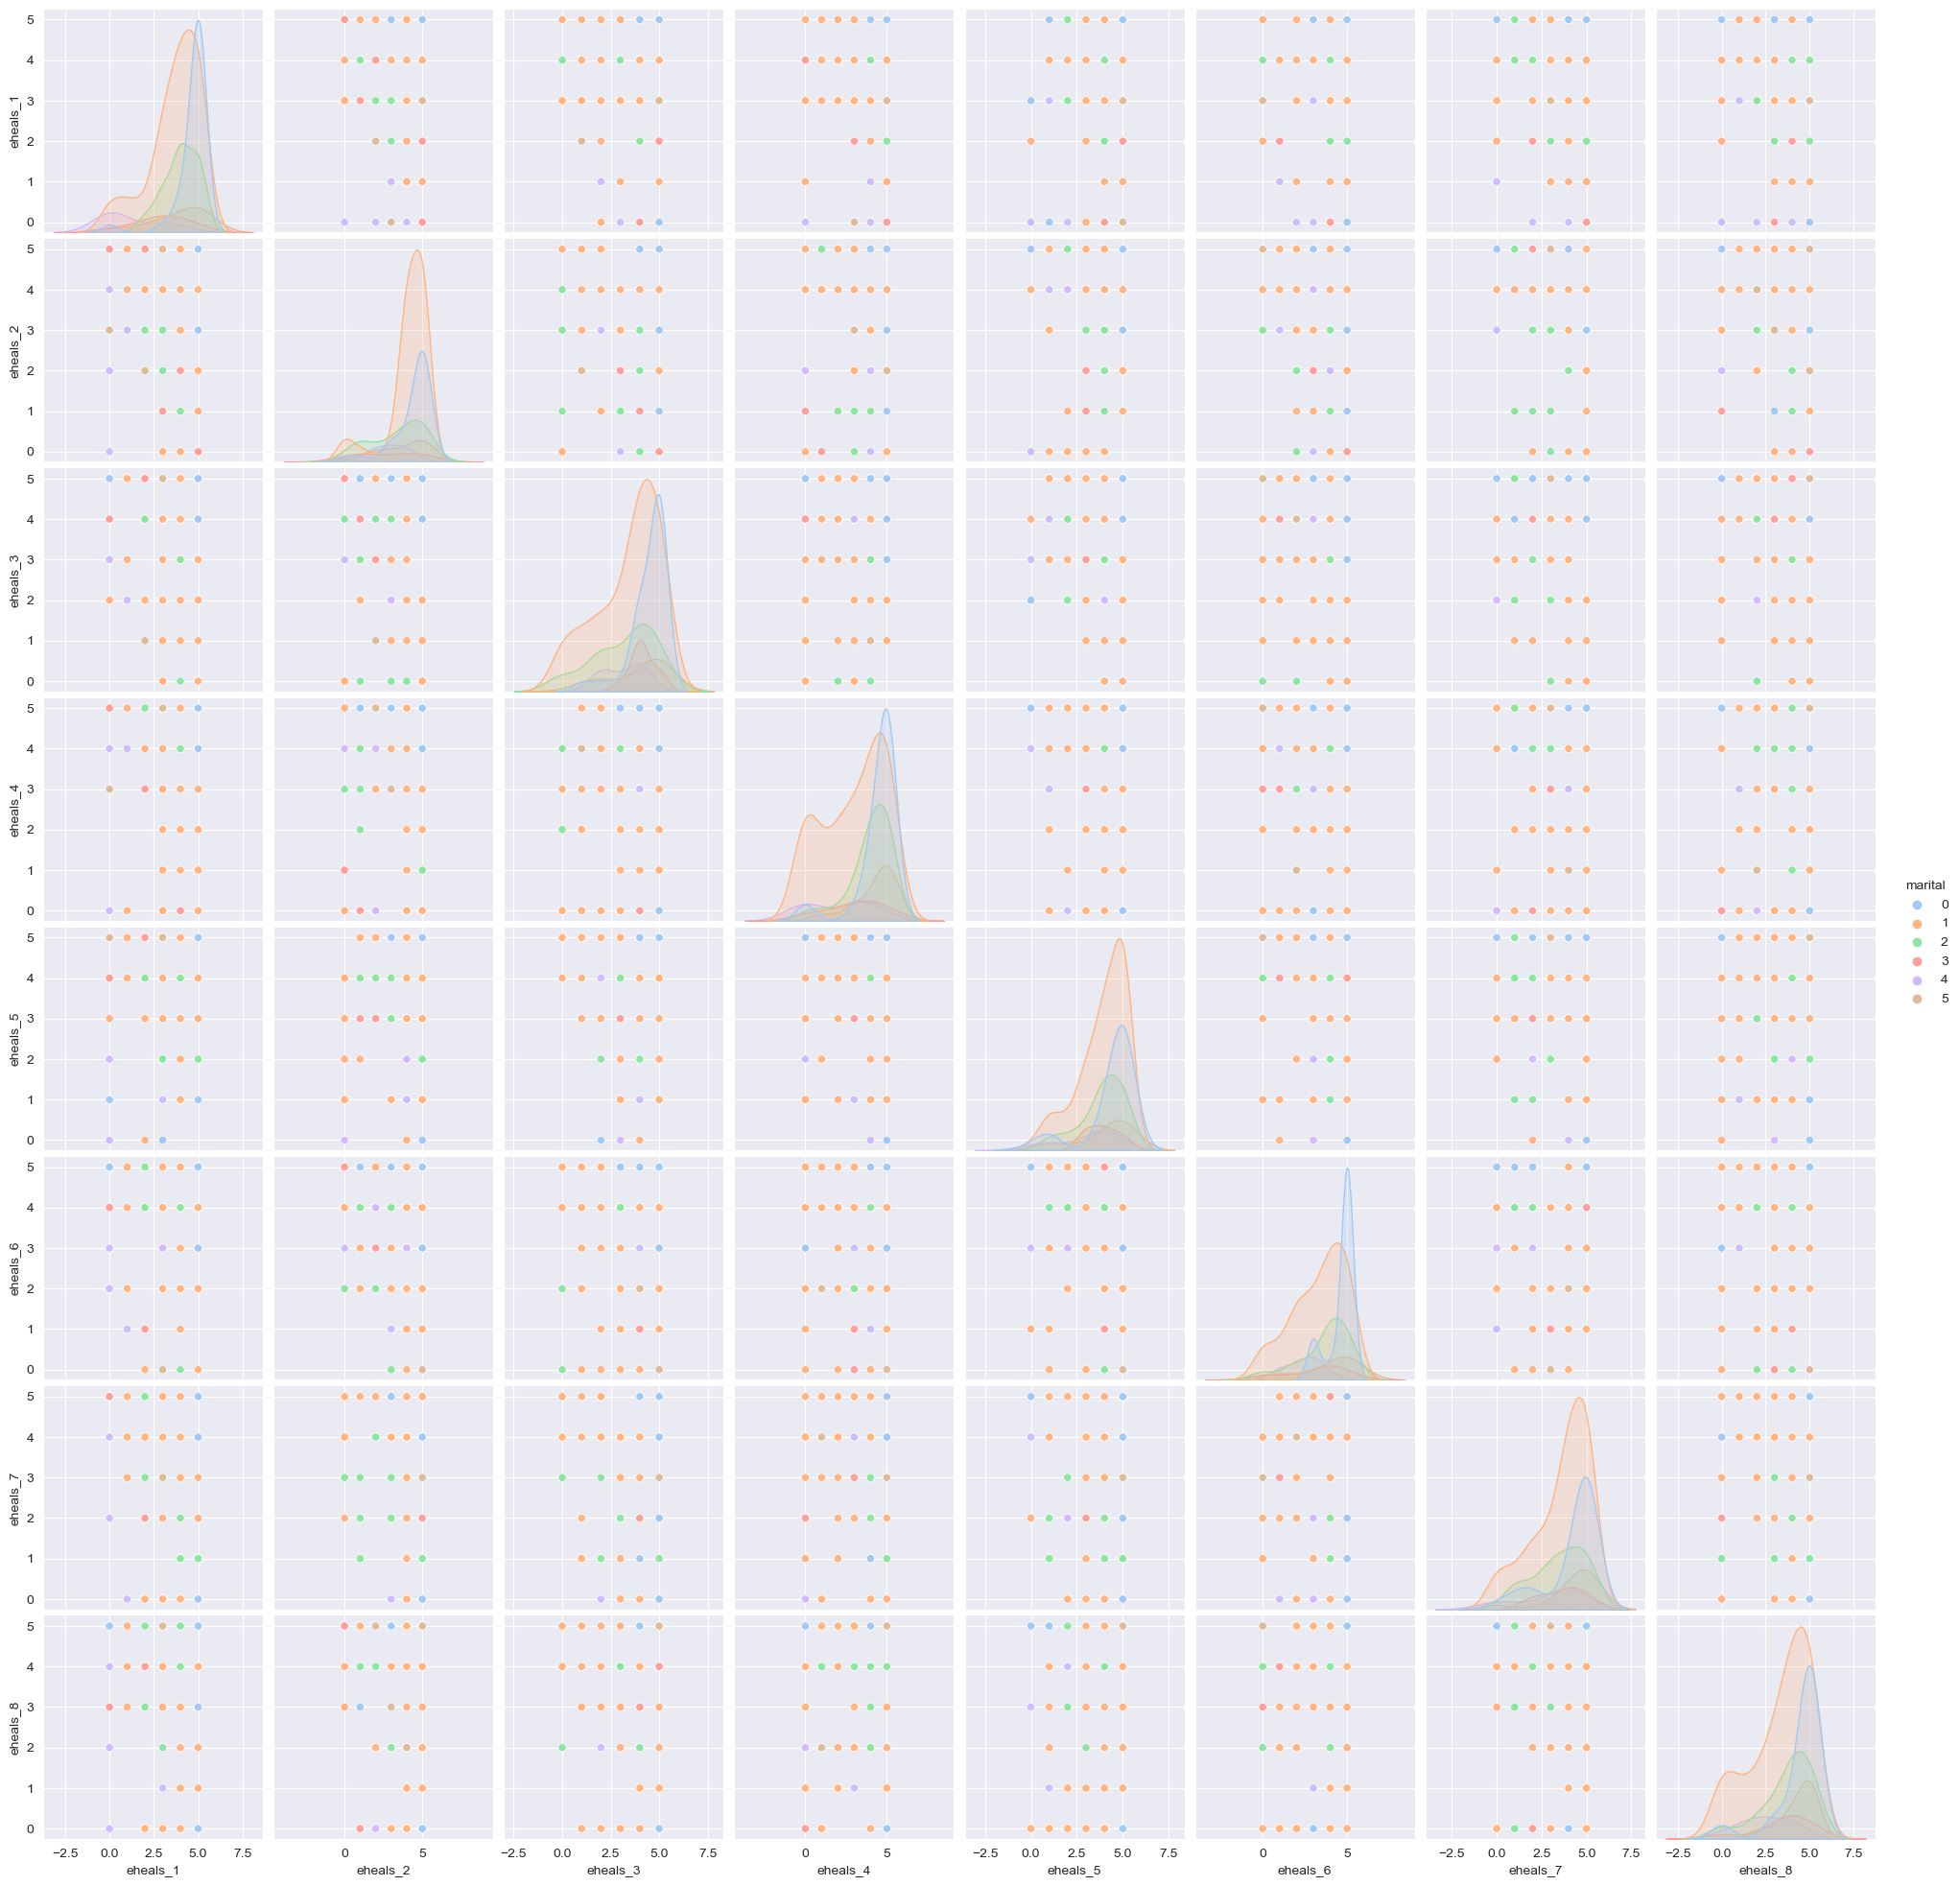

In [62]:
plt.show()
# multivariate analysis of marital and features from eheals
sns.pairplot(data,
             vars=['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8'],
             hue='marital', palette='pastel')
plt.show()

In [101]:
# scaling the income and the educational
fun = 5/(max(data['income'] - min(data['income']))) 
data['income'] = data['income'].map(lambda x: fun*(x - max(data['income'])) + 5)
  
fun = 5/(max(data['education'] - min(data['education'])))
data['education'] = data['education'].map(lambda x: fun*(x - max(data['education'])) + 5)

C:\Users\mcrin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcrin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcrin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


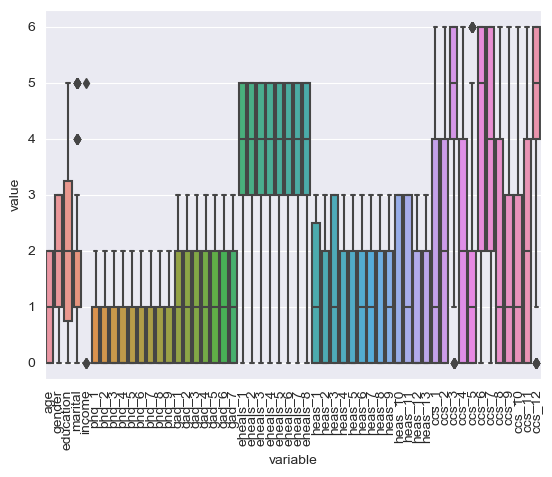

In [103]:
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data))
plt.xticks(rotation = 90)
plt.show()